In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import warnings

- You can find reference in this link.

https://www.kaggle.com/arashnic/hr-ana

### Atribut	Description
	
- id_karyawan :	 id karyawan
- departemen :	 departemen tempat karyawan bekerja (contoh: Sales & Marketing. Operations, Technology) 
- wilayah	: wilayah kerja karyawan 
- pendidikan  :	tingkat pendidikan karyawan 
- jenis_kelamin : jenis kelamin karyawan 
- rekrutmen	: jalur rekrutmen 
- jumlah_training :	jumlah pelatihan yang diselesaikan oleh karyawan selama setahun terakhir baik teknis maupun non teknis 
- umur : umur karyawan 
- rating_tahun_lalu	: rating karyawan tahun lalu 
- masa_kerja :	masa bekerja karyawan dalam tahun 
- KPI_>80%	: key performance index apakah lebih besar dari 80% (Ya = 1, Tidak = 0)
- penghargaan :	jika memenangkan penghargaan sebagai karyawan maka 1, jika tidak = 0 
- rata_rata_skor_training :	skor training rata-rata 
- dipromosikan	: target (recommended for promotion) 

### Load Data Set

In [2]:
df = pd.read_excel("dataset_test_ds.xlsx")

In [3]:
print(df.shape)
df.head()

(54808, 14)


,id_karyawan,departemen,wilayah,pendidikan,jenis_kelamin,rekrutmen,jumlah_training,umur,rating_tahun_lalu,masa_kerja,KPI_>80%,penghargaan,rata_rata_skor_training,dipromosikan
0,80589,Sales & Marketing,wilayah_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,80292,Operations,wilayah_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,22664,Sales & Marketing,wilayah_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,17693,Sales & Marketing,wilayah_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,64096,Technology,wilayah_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


## << EDA SECTION >>

### Drop unnecessary column

In [4]:
df.drop(['id_karyawan'], axis =1 , inplace=True)

- We will drop unnecessary column to be used in further analysis, id_karyawan is just ID and Name, we cant gain information from it.

### Check Missing Values

In [5]:
df.isnull().sum()

departemen                    0
wilayah                       0
pendidikan                 2409
jenis_kelamin                 0
rekrutmen                     0
jumlah_training               0
umur                          0
rating_tahun_lalu          4124
masa_kerja                    0
KPI_>80%                      0
penghargaan                   0
rata_rata_skor_training       0
dipromosikan                  0
dtype: int64

- From table above we can see, "pendidikan" and "rating_tahun_lalu" have a missing value.
- We will handle this this missing value in the next section.

#### -> Handle missing value in "Pendidikan"

- We will input the missing value for Pendidikan by the mode value of its age.

In [6]:
def fill_pendidikan(df, age):
    mode_pendidikan = df[df.umur == age].pendidikan.mode().values[0]
    
    return mode_pendidikan

In [7]:
df.loc[df.pendidikan.isnull(), 'pendidikan'] = df[df.pendidikan.isnull()].apply(lambda x : fill_pendidikan(df, x['umur']), axis=1)

#### -> Handle missing value in "rating_tahun_lalu"

- We will input the missing value for Rating_tahun_lalu by the mode value of its departemen and wilayah.

In [8]:
def fill_rating_tahun_lalu(df, dept, wil):
    mode_rating = df[(df.departemen == dept) & (df.wilayah == wil)].rating_tahun_lalu.mode().values[0]
    
    return mode_rating

In [9]:
df.loc[df.rating_tahun_lalu.isnull(), 'rating_tahun_lalu'] = df[df['rating_tahun_lalu'].isnull()].apply(lambda x : fill_rating_tahun_lalu(df, x['departemen'], x['wilayah']), axis=1)

In [10]:
df.isnull().sum()

departemen                 0
wilayah                    0
pendidikan                 0
jenis_kelamin              0
rekrutmen                  0
jumlah_training            0
umur                       0
rating_tahun_lalu          0
masa_kerja                 0
KPI_>80%                   0
penghargaan                0
rata_rata_skor_training    0
dipromosikan               0
dtype: int64

In [11]:
# save to csv file in order to avoid repeated action

# df.to_csv("data_clean.csv")

In [12]:
df = pd.read_csv("data_clean.csv")

In [13]:
df.drop('Unnamed: 0', axis= 1, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   departemen               54808 non-null  object 
 1   wilayah                  54808 non-null  object 
 2   pendidikan               54808 non-null  object 
 3   jenis_kelamin            54808 non-null  object 
 4   rekrutmen                54808 non-null  object 
 5   jumlah_training          54808 non-null  int64  
 6   umur                     54808 non-null  int64  
 7   rating_tahun_lalu        54808 non-null  float64
 8   masa_kerja               54808 non-null  int64  
 9   KPI_>80%                 54808 non-null  int64  
 10  penghargaan              54808 non-null  int64  
 11  rata_rata_skor_training  54808 non-null  int64  
 12  dipromosikan             54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


- After filling the missing value, now we will check again, and we dont have any missing value in our data. And now our data is ready to be used in further analysis.
- We will devide this section into 2 part :
    - Part 1, Categorical - Categorical Features.
    - Part 2, Numerical - Categorical Features.
- First, we select which columns contain number or object.

### Data Type each Column  

Before we select data type, we have to change the "dipromosikan, KPI_>80%, penghargaan" into object type, since those columns are actually categorical columns, with yes(1) or no(0) value.

In [15]:
for col in ['dipromosikan', 'KPI_>80%', 'penghargaan']:
    df[col] = df[col].astype('object')

In [16]:
cat_columns = list(df.select_dtypes(include='object'))
num_columns = list(df.select_dtypes(exclude='object'))
print('>> categorical columns :'.upper(), *cat_columns, sep='\n')
print('='*25)
print('>> numerical columns :'.upper(), *num_columns, sep='\n')

>> CATEGORICAL COLUMNS :
departemen
wilayah
pendidikan
jenis_kelamin
rekrutmen
KPI_>80%
penghargaan
dipromosikan
>> NUMERICAL COLUMNS :
jumlah_training
umur
rating_tahun_lalu
masa_kerja
rata_rata_skor_training


- As we see Categorical Columns have 8 items, and Numerical Columns have 5 items.

### 1. Categorical - Categorical Feature

- In this section we will try to find some informations regarding our categorical feature.
- And find relation between them using some methods.

#### 1.1 Categorical Portion each Feature

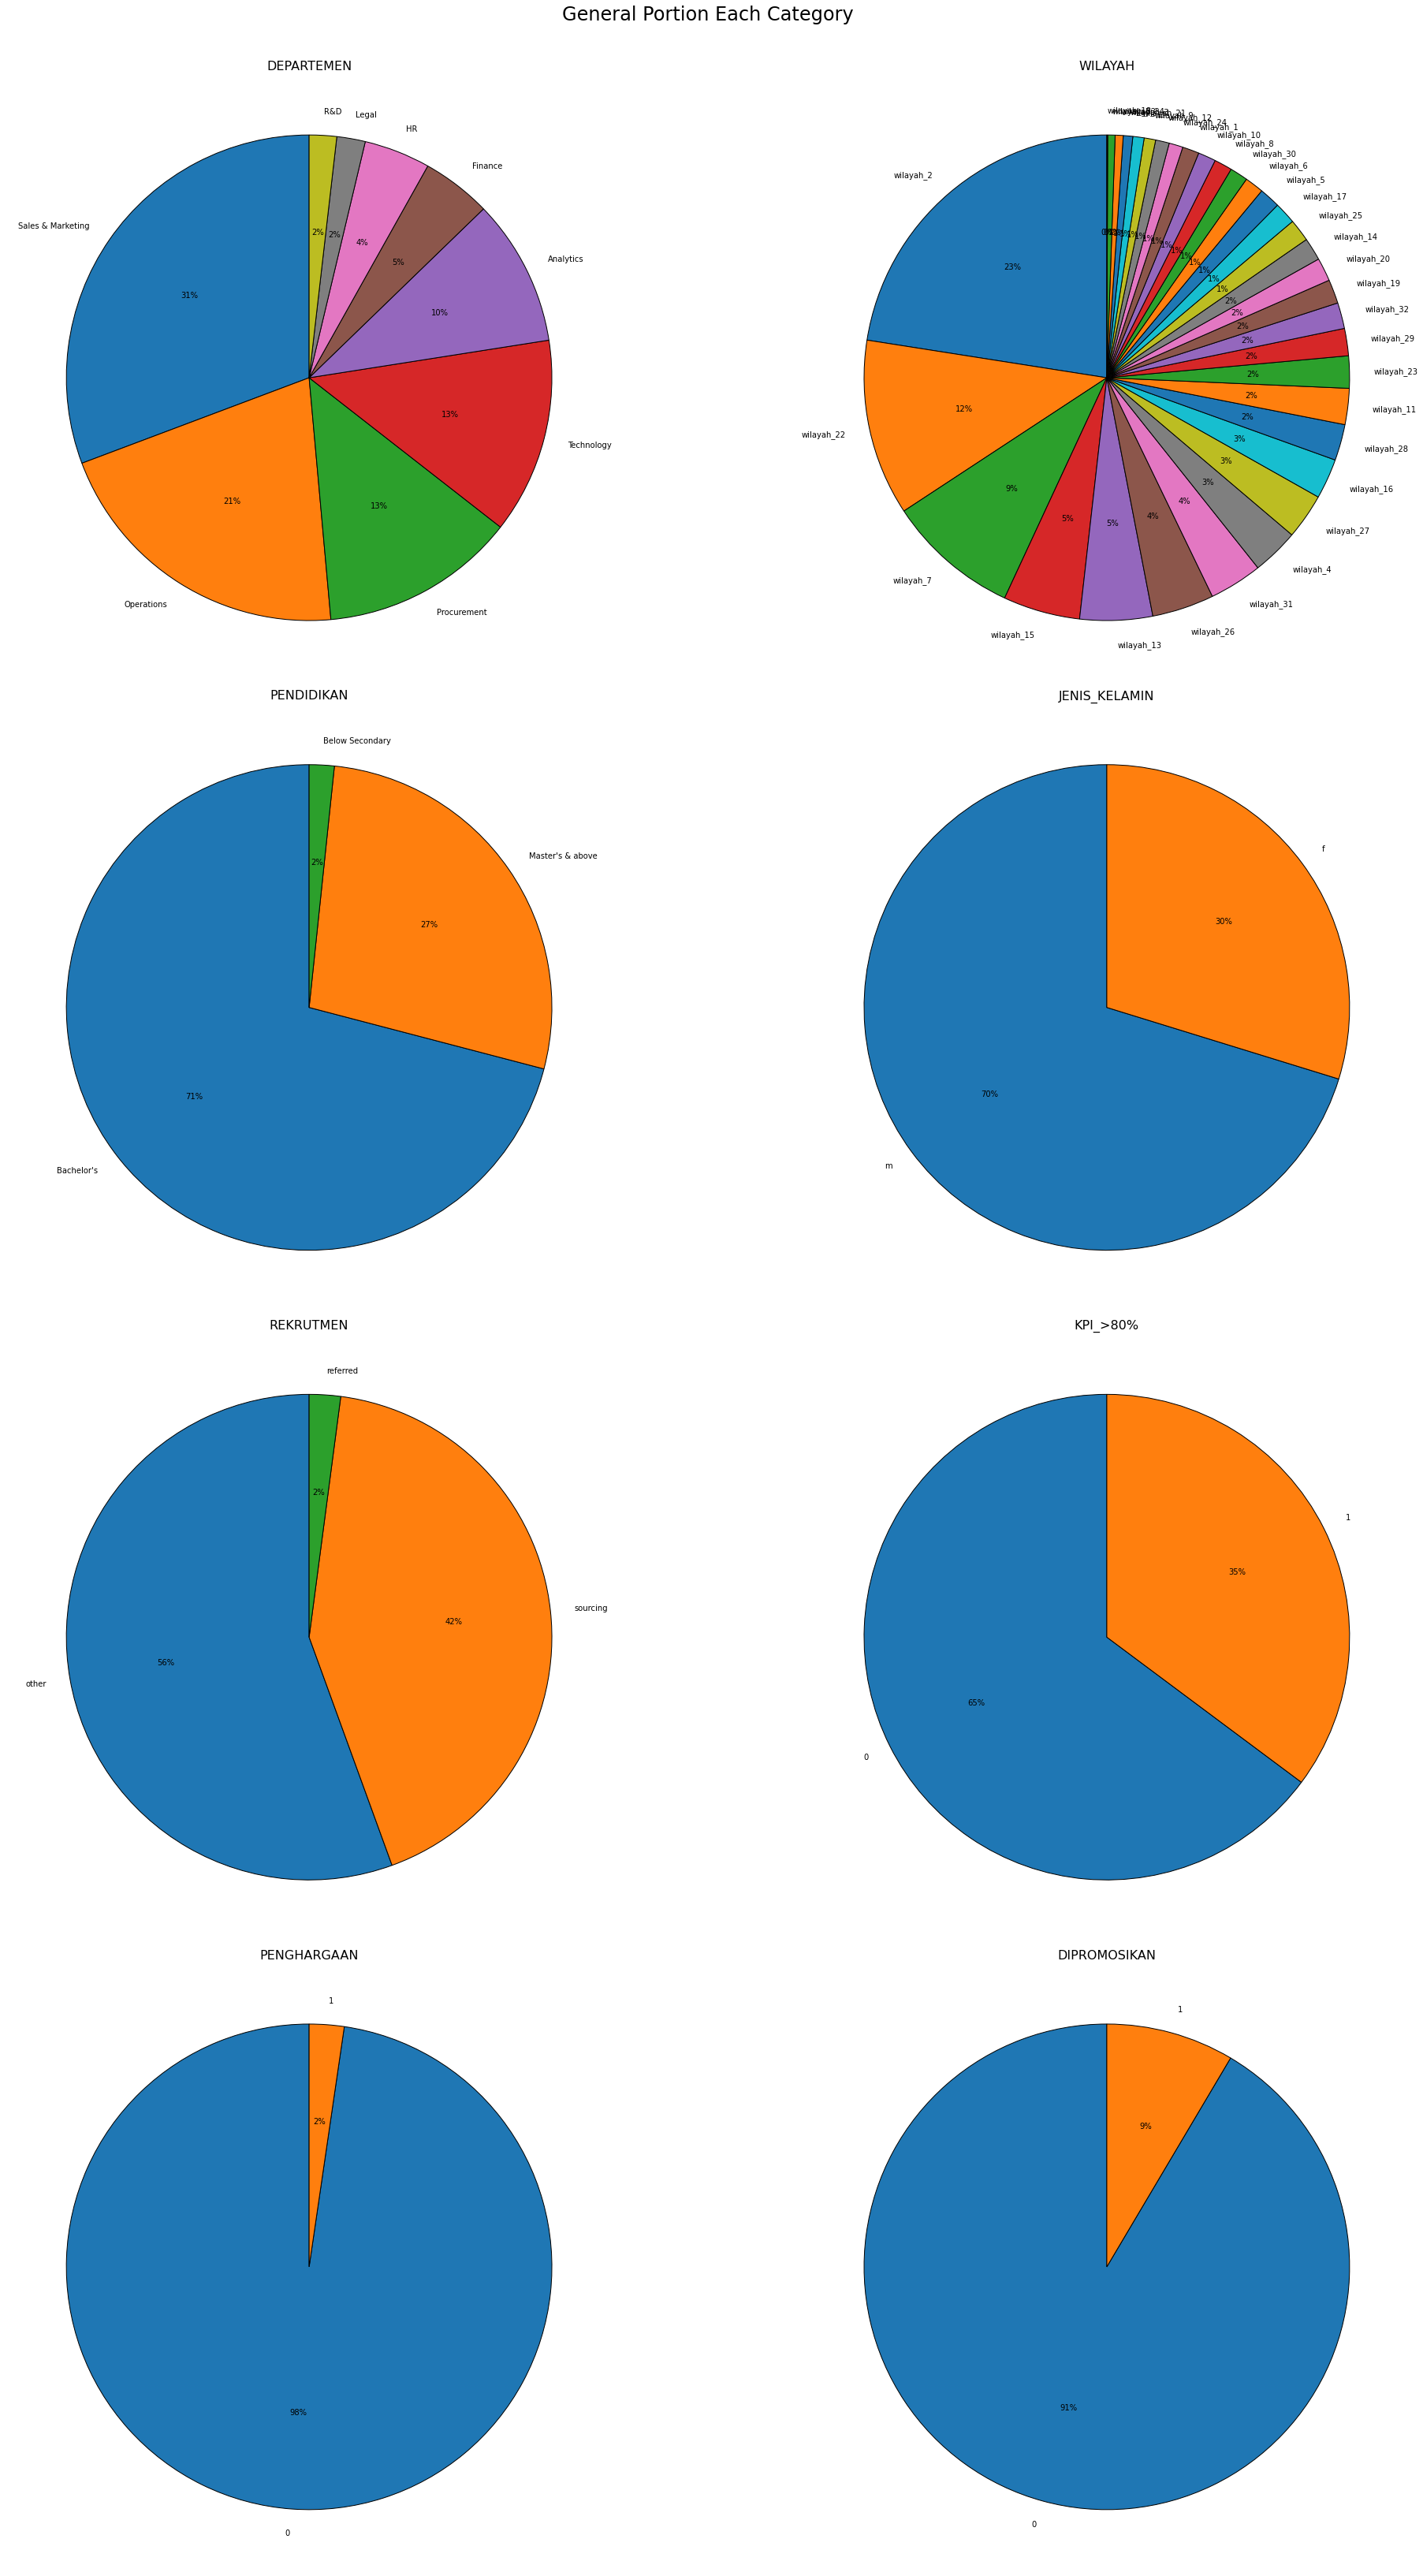

In [17]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

fig, axs = plt.subplots(4, 2, figsize=(30, 45), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=0.2)
axs = axs.ravel()

for index, col in enumerate(cat_columns):
    df[col].value_counts().plot.pie(autopct = "%1.0f%%", startangle=90 
                                    ,shadow = False, ax=axs[index],fontsize=10, 
                                    wedgeprops={"linewidth":1,"edgecolor":"k"})
    axs[index].set_title(col.upper(),fontsize=16)
    axs[index].set_ylabel('')
    
# axs.flat[-1].set_visible(False)
fig.suptitle('General Portion Each Category', va='bottom', fontsize =24, y=1)
fig.tight_layout()

- From all graph above, we can see the portion of each categorical feature. 
- We are interested in major portion of each feature, for our target feature "dipromosikan" 9% is 1(True) and 91% is 0(False), so our target variable is quite high imbalance. And next "penghargaan", most of the employee havent got penghargaan with 98% of 0. then for "pendidikan" we can see 71% is bachelor's, also gender 70% is male. And 65% of employee doesnt achive KPI >80%.
- For rekrutmen, we can see the portion is quite similar between sourcing and other. and for departemen the portion is also quite similar along 4 classes.
- For wilayah, even there are so many class in this columns, but only wilayah_2's portion is quite significant among the others.

#### 1.2 Categorical Vs DIPROMOSIKAN

- Because wilayah has a lot of unique value, we will plot separately, it will make the plot unclear if we put into this graph.

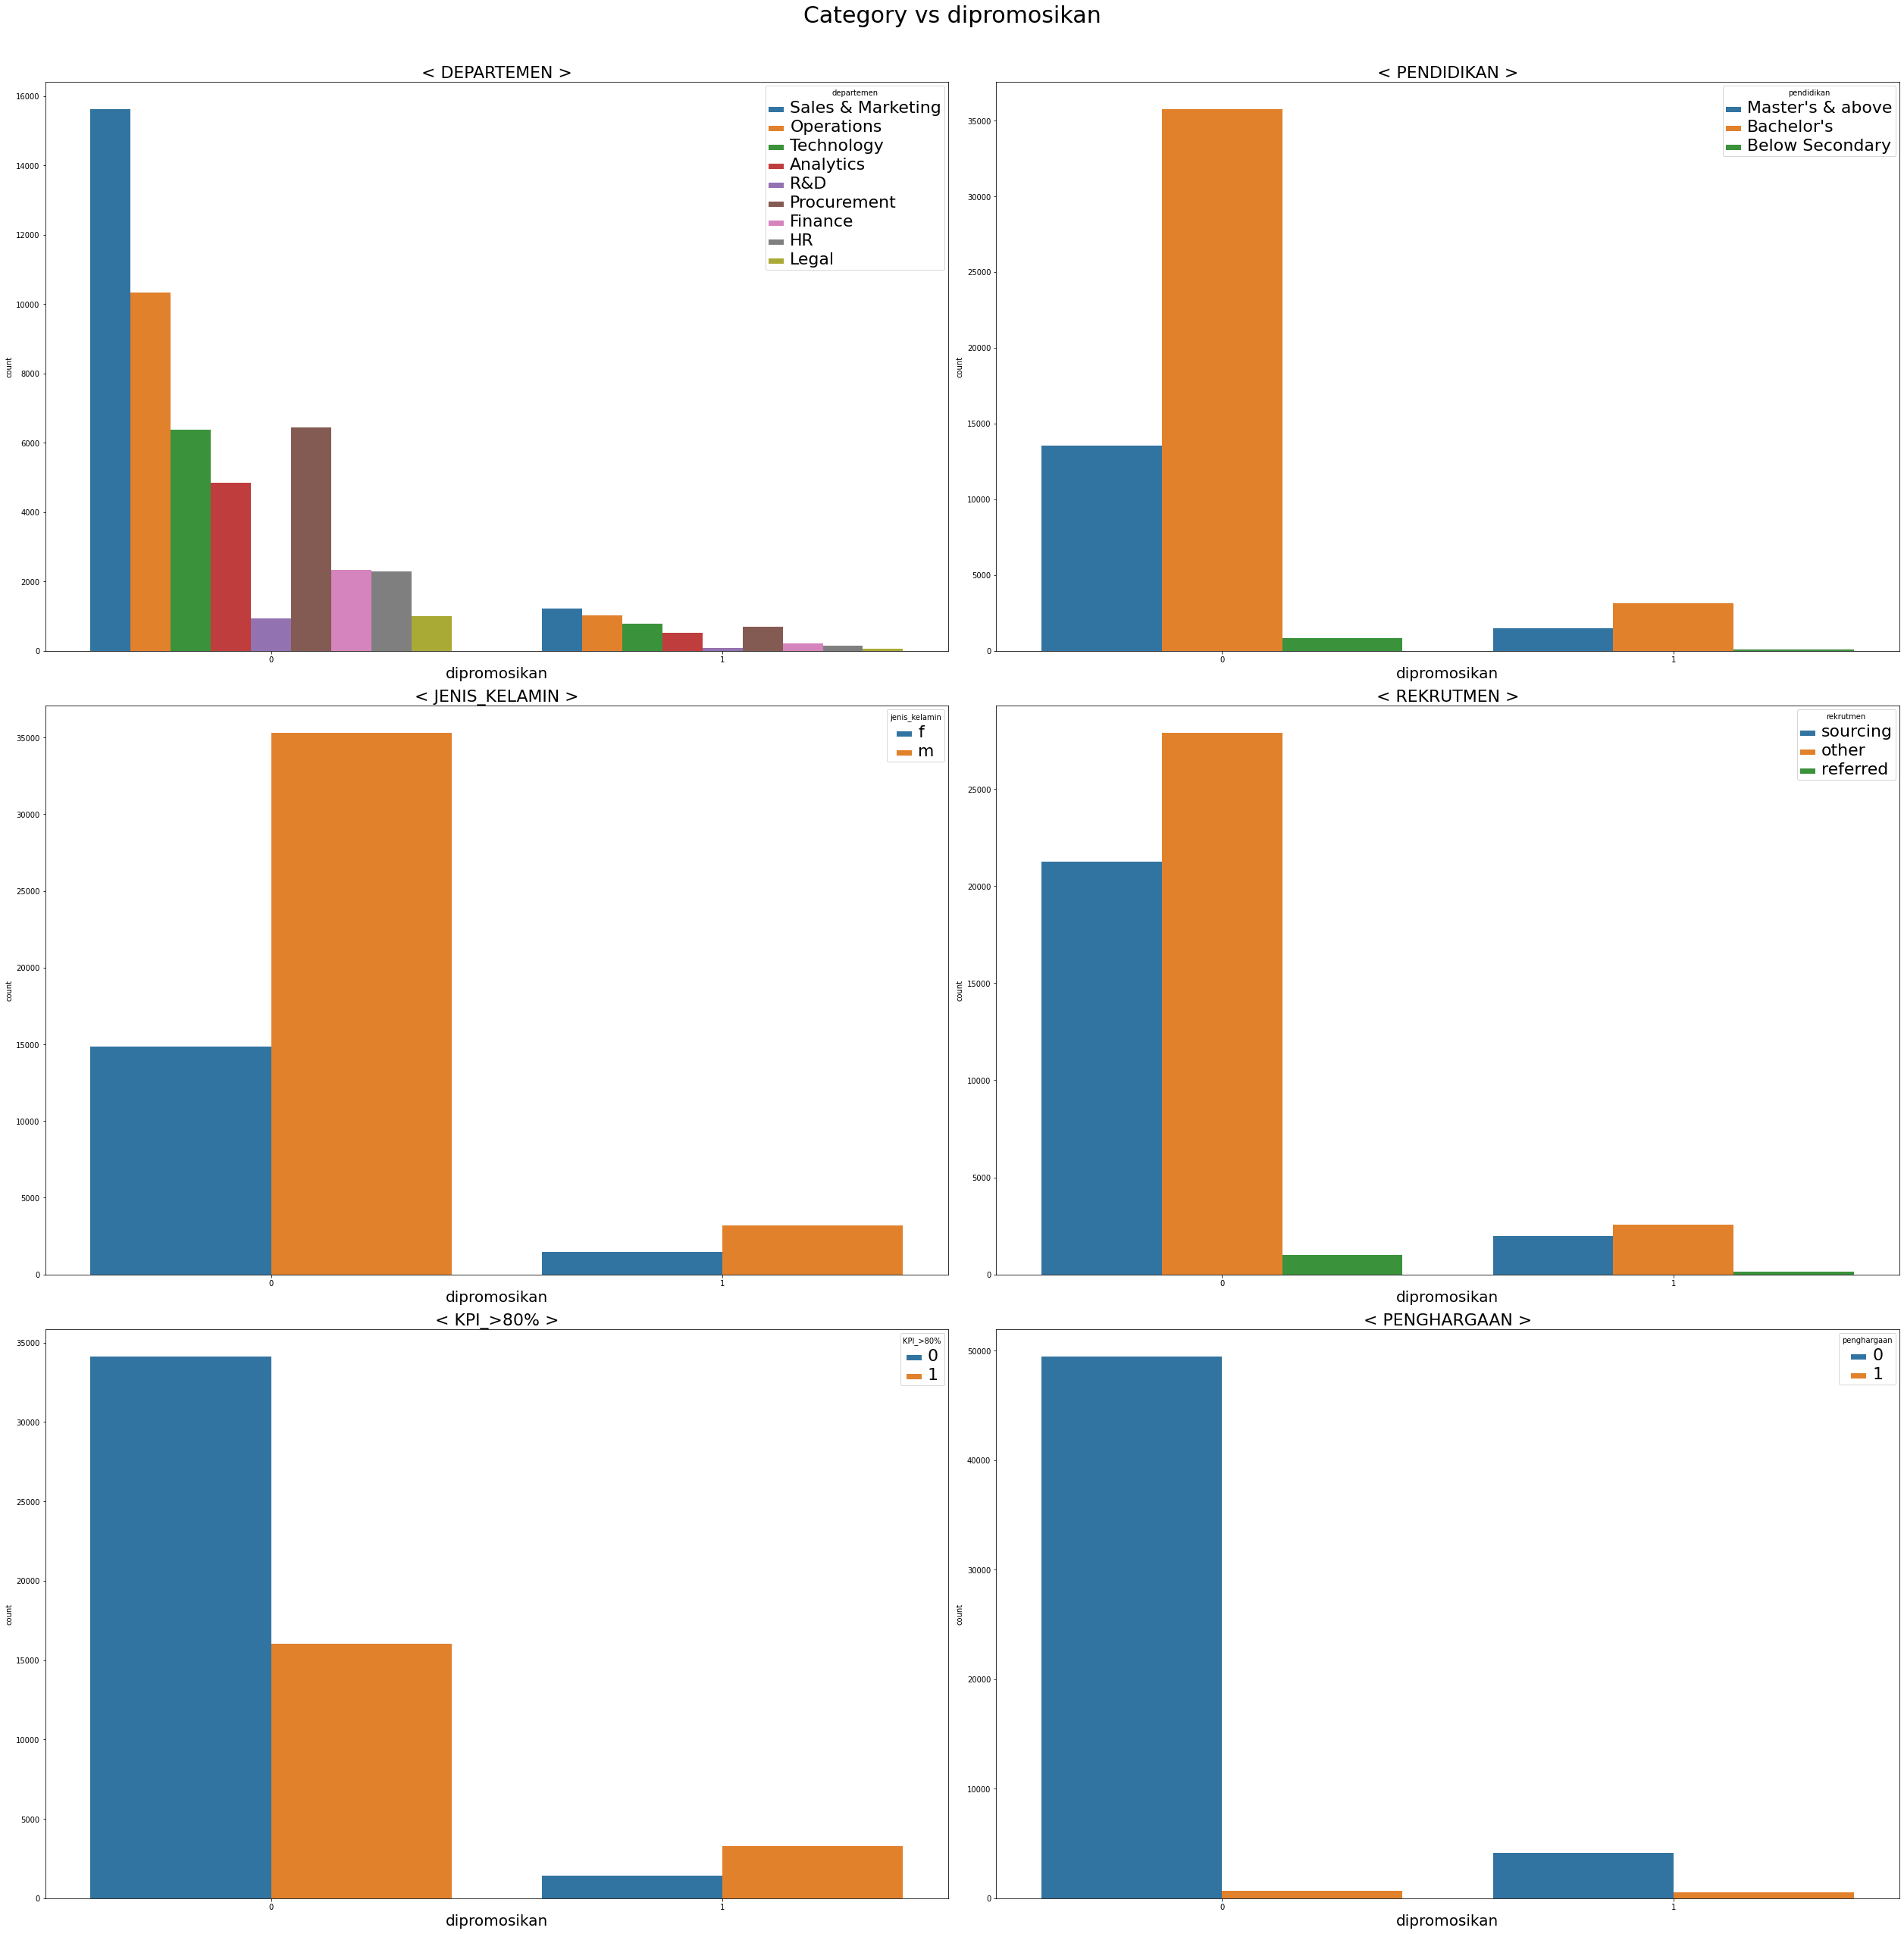

In [18]:
fig, axs = plt.subplots(3, 2, figsize=(35, 35), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.6)
axs = axs.ravel()

categorical_columns2 = list(cat_columns).copy()
categorical_columns2.remove('dipromosikan')
categorical_columns2.remove('wilayah')

for index, col in enumerate(categorical_columns2):
    sns.countplot(x='dipromosikan', hue=col, data=df, ax=axs[index])
    axs[index].set_title(f'< {col.upper()} >',fontsize=22)
    axs[index].set_xlabel('dipromosikan', fontsize=20)
    plt.setp(axs[index].get_legend().get_texts(), fontsize=22)

fig.suptitle('Category vs dipromosikan', va='bottom', fontsize=30, y= 1)
fig.tight_layout()

- From graph above we can see the categorical feature with respect to departemen.
- We would like to know about which value that has bigger portion on dipromosikan either 0 or 1 ;
    - For pendidikan_bachelors, jenis_kelamin_m, rekrutmen_others, penghargaan_0,departemen_sales&marketing, they all have bigger portion either in dipromosikan_0 or dipromosikan_1, but it's not suprising since the biggest portion that we can see in the previous graph are from them also.
    - the interesting fact is, KPI>80%, we can see value here. even KPI80%_1 is minority class, when it comes to the dipromosikan_1 it becomes a bigger portion here. we can say that KPI80% has quite significant association with dipromosikan.

##### 1.2.1 Wilayah Plot vs Dipromosikan

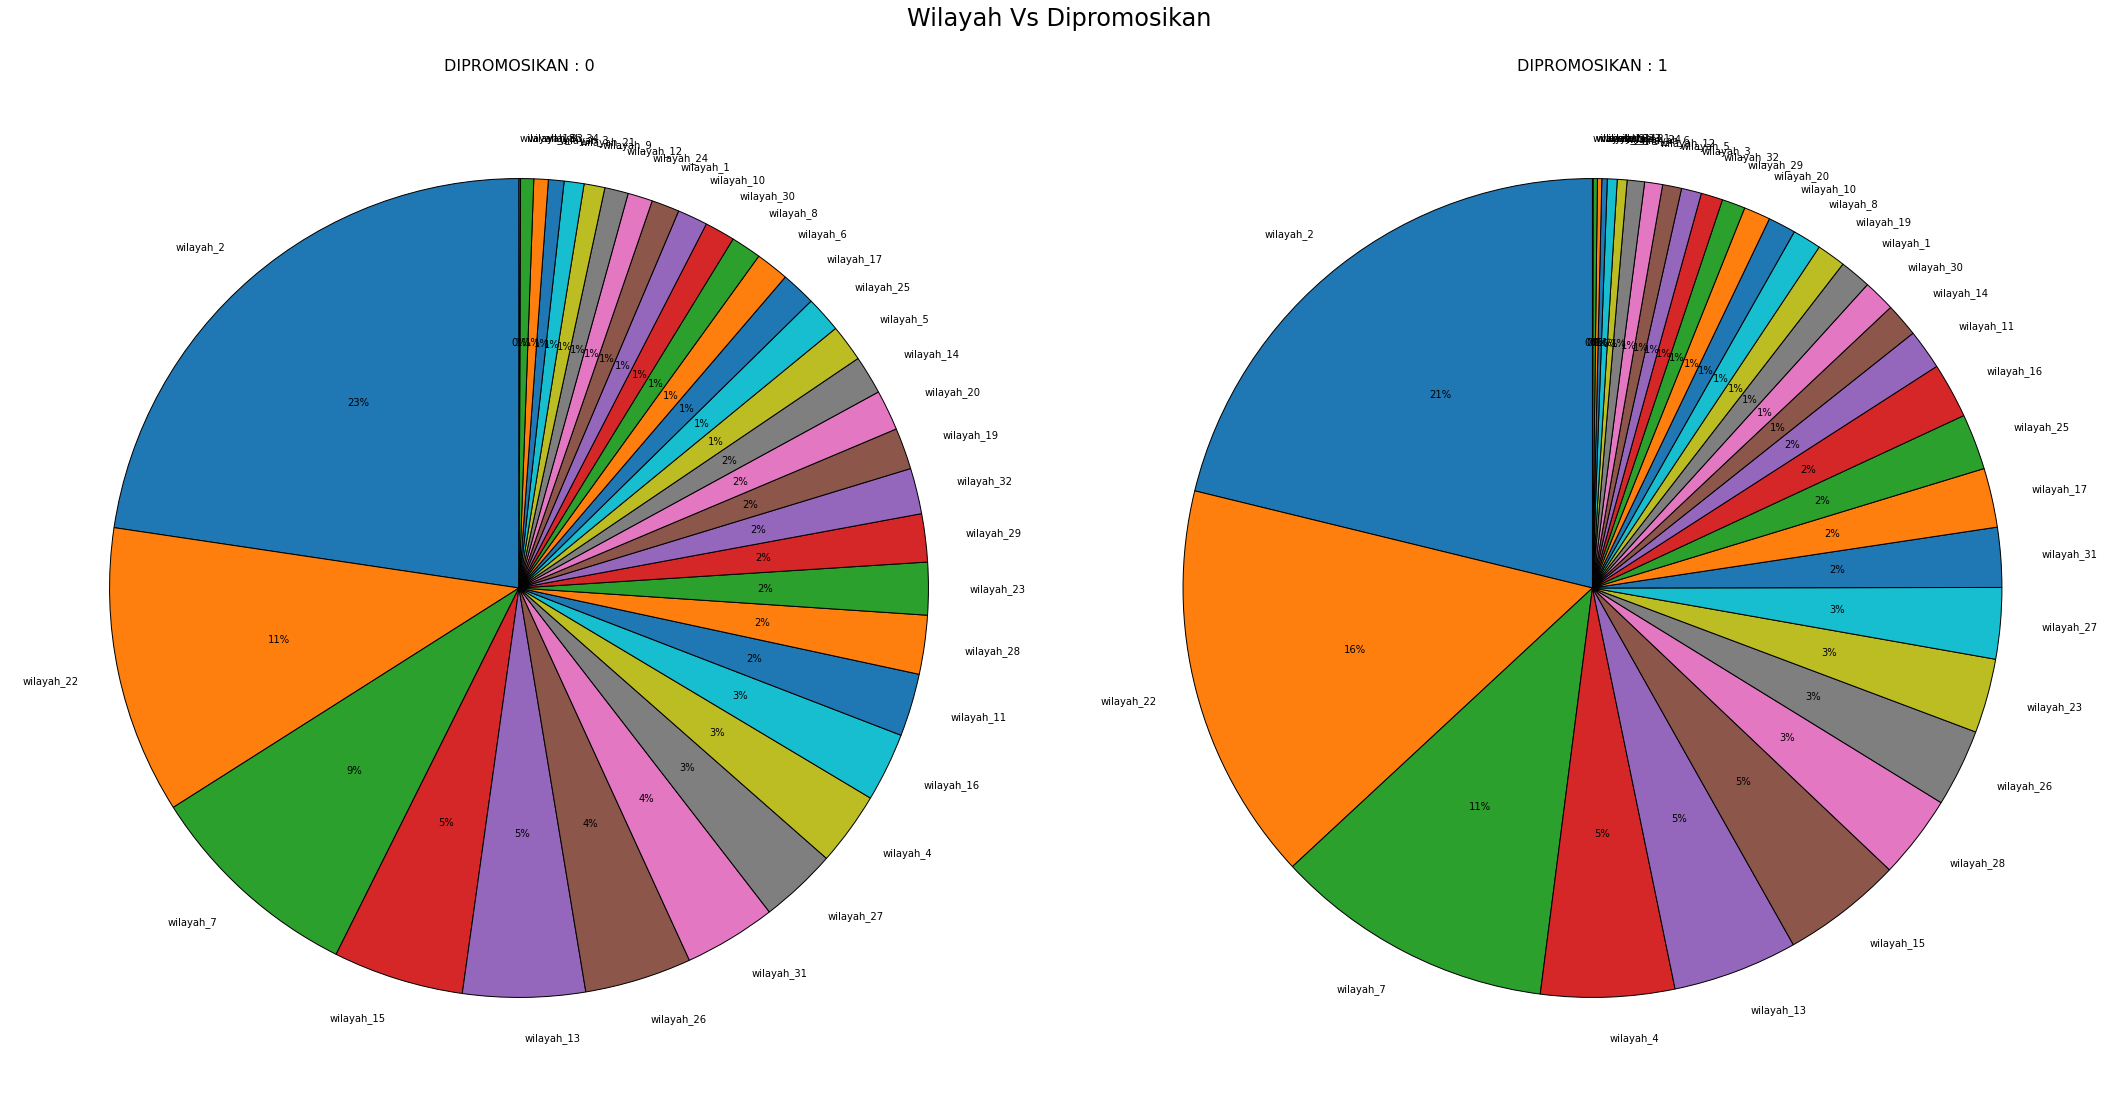

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(30, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=0.2)
axs = axs.ravel()

for index, col in enumerate([0, 1]):
    df['wilayah'][df.dipromosikan == col].value_counts().plot.pie(autopct = "%1.0f%%", startangle=90 
                                    ,shadow = False, ax=axs[index],fontsize=10, 
                                    wedgeprops={"linewidth":1,"edgecolor":"k"})
    
    axs[index].set_title('DIPROMOSIKAN : '+ str(col).upper(), fontsize=16)
    axs[index].set_ylabel('')
    
fig.suptitle('Wilayah Vs Dipromosikan', va='bottom', fontsize =24, y=1)
fig.tight_layout()

- from this graph we can get the portion of dipromosikan_0 and dipromosikan_1 is quite similar among 3 major classes (wilayah_2, wilayah_22, wilayah_7), again this is not suprising as we know those classes are major class in this data set.

#### 1.3 Categorical vs Dipromosikan_1

- Since we want to know about the person who has been promoted in the company or not, so we will look more detail into dipromosikan_1 class, and we will analyze which factor has bigger effect.
- We can know that by seeing a pareto chart below.
- Since there is no pareto chart in builtin function, so we make our own pareto chart function.

In [20]:
def pareto_plot(df, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}', clr_dict=None):
    xlabel = x
    ylabel = y
    tmp = df.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(30,17))
    barplot = sns.barplot(data= df, x=x, y=y, ax=ax1, palette=clr_dict)
    ax1.set_ylabel('Dipromosikan_1')
    ax1.tick_params(labelrotation=90)

    ax2 = ax1.twinx()

    ax2.plot(x, cumsum, '-ro', alpha=0.5)
        
    ax2.set_ylabel('Cumulative Percentage', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = [i/10 for i in range(0, 11)]
    ax2.set_yticks(vals)
    ax2.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]

    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]-0.05), fontweight='heavy' )
        barplot.text(i, y[i], str(round(weights[i]*100,1))+'%', color='black', ha="center", va='bottom')
    
    if title:
        plt.title(title)
    
    plt.show()

In [21]:
df_pareto = pd.DataFrame(columns=['Parameter', 'Value'])

for item in categorical_columns2 :
    temp = df.groupby([item, 'dipromosikan']).count()['umur'].reset_index()
    temp = temp[temp.dipromosikan == 1][[item, 'umur' ]].rename(columns = {item: 'Parameter', 'umur' : 'Value'})
    temp['Parameter'] = item + '-' + temp['Parameter'].astype(str)
    
    df_pareto = df_pareto.append(temp, ignore_index=True)

In [22]:
df_pareto['Normalize'] = df_pareto.Value/sum(df_pareto.Value) * df.dipromosikan.value_counts()[1]

In [23]:
df_pareto.head()

,Parameter,Value,Normalize
0,departemen-Analytics,512,85.333333
1,departemen-Finance,206,34.333333
2,departemen-HR,136,22.666667
3,departemen-Legal,53,8.833333
4,departemen-Operations,1023,170.5


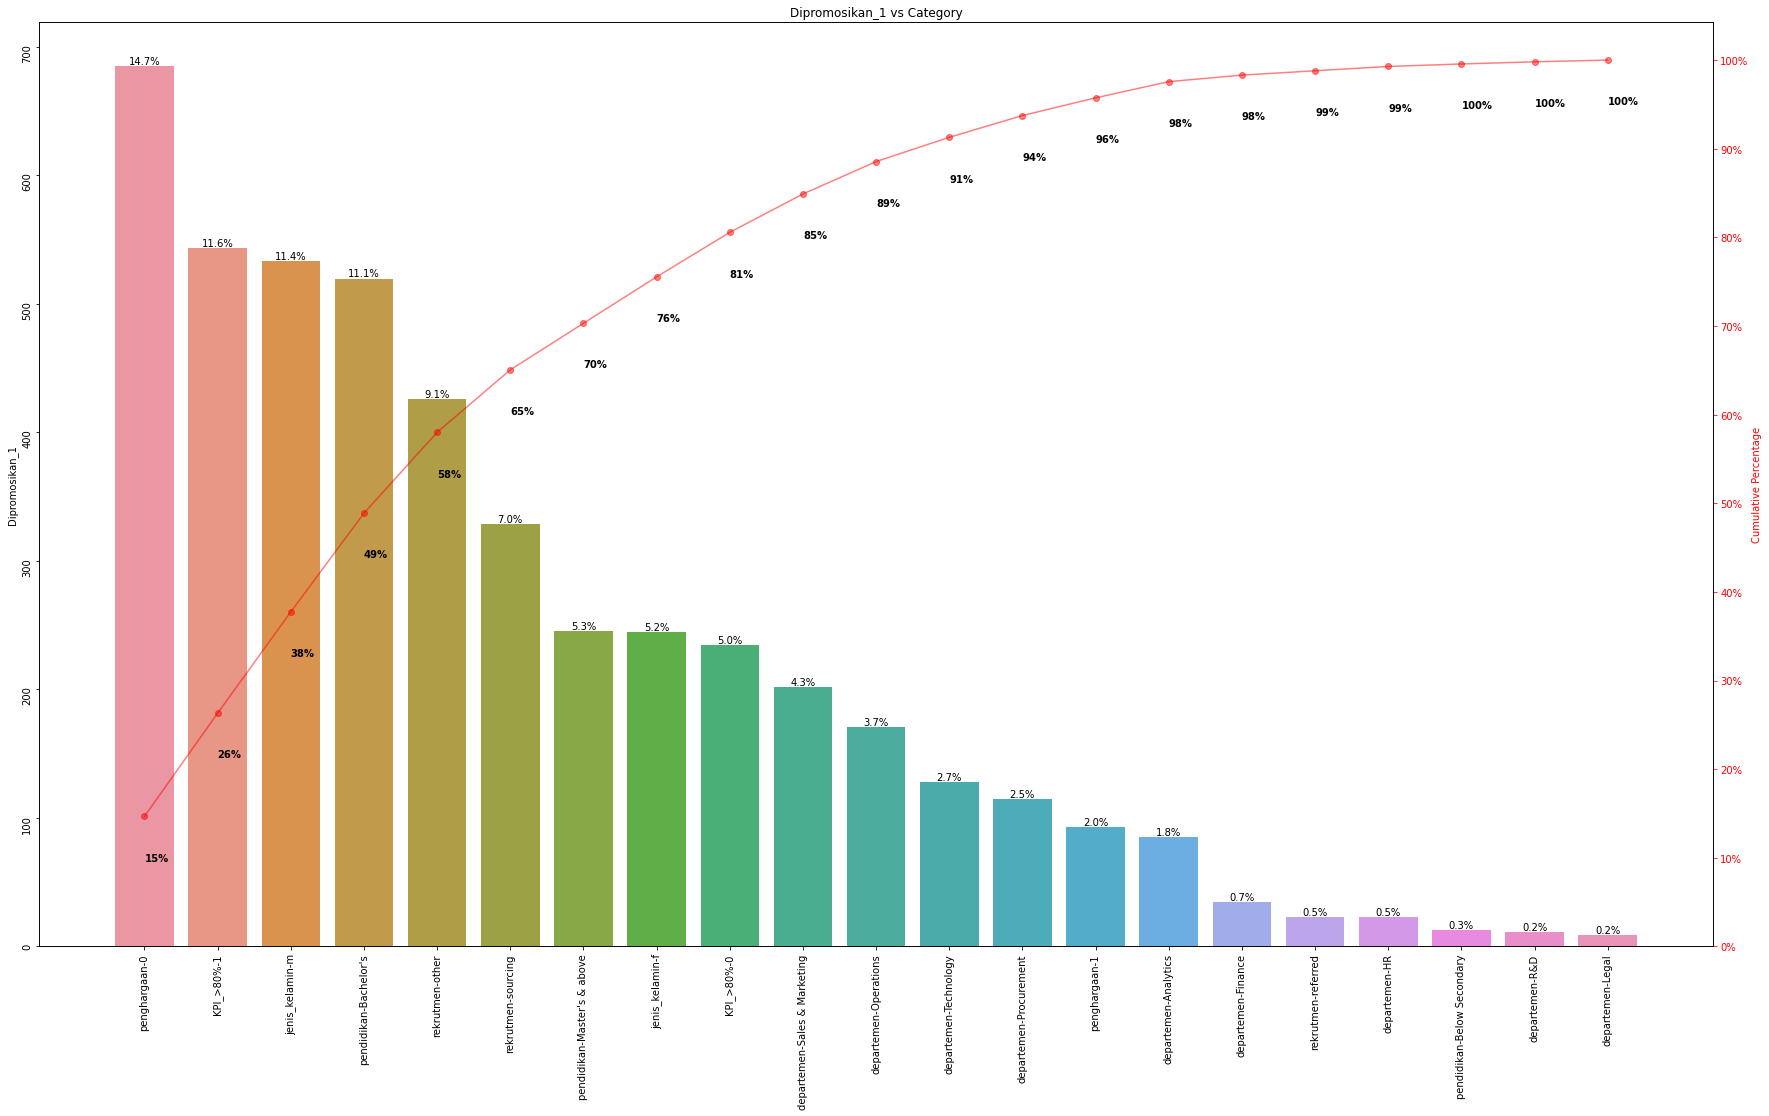

In [24]:
title_no = 'Dipromosikan_1 vs Category'
pareto_plot(df = df_pareto, x='Parameter', y = 'Normalize', title= title_no, show_pct_y=True)

- From pareto chart above tells us, the portion of each categorical value with respect to the Dipromosikan_1. 
- We can see Penghargaan_0, KPI80%_1, Jenis_kelamin_m, pendidikan_bachelors are top 4 category.
- Now we get clear picture about our assumption regarding KPI80%, it's top 2 of higher value.
- for Penghargaan_0 isnt suprising since the portion of this columns is very imbalance, with 98% of "0" and 2% of "1".
- And we will do the statistical testing and association method to check the relation between these categorical features.

#### 1.4 Relation between Categorical Features

- In order to see the relationship between variable, we will try these approaches ;
    - We will plot the association between them using CramerV.
    - And also we will do statiscal test, Chi-Sq Test, to check with hypotesis testing.
- Since this is not Continous variable, we will try to find the assosiation with another approach, in my opinion this is a more appropriate way instead of using a Correlation method.
- Association is similarly to correlation, the output is in the range of [0,1], where 0 means no association and 1 is full association. (Unlike correlation, there are no negative values, as there’s no such thing as a negative association. Either there is, or there isn’t)
- You can find out on this good articel as my reference
<a>https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9</a>

In [25]:
from dython.nominal import associations

In [26]:
categorical_columns3 = categorical_columns2.copy()
categorical_columns3.append('wilayah')
categorical_columns3.append('dipromosikan')

#### 1.4.1 Association between Feature using CramerV

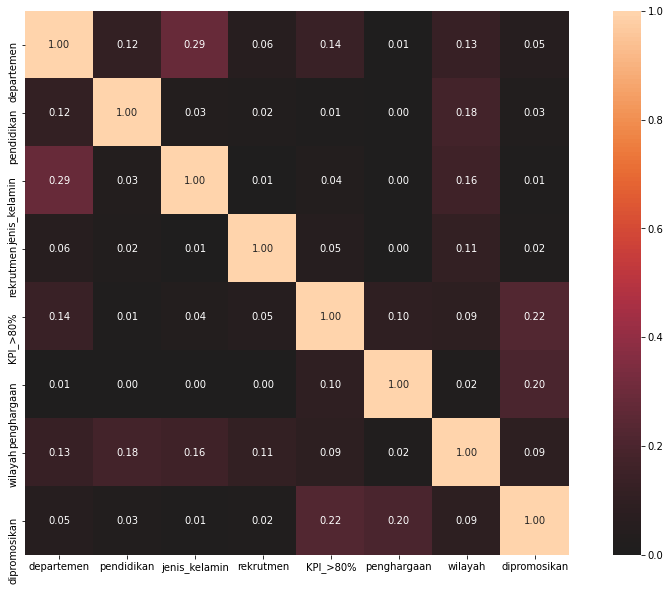

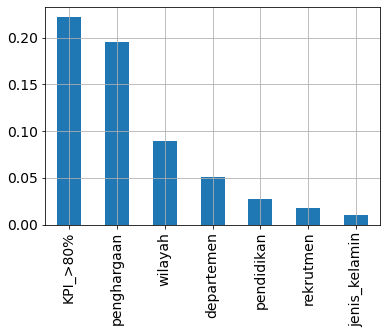

In [27]:
plot_asso = associations(dataset=df[categorical_columns3], nom_nom_assoc='cramer', 
                         nominal_columns='all', figsize=(16,10))

plot_asso['corr']['dipromosikan'].sort_values(ascending=False)[1:].plot.bar(fontsize = 14, rot = 90, grid = True)
plt.show()

- From Matrix association above, we can see almost each category has very small value that associates with Dipromosikan, less than 0.2.
- Only KPI that has higher value, but still not significant value, its only 0.22.
- And also the matrix tells us about, there is no strong association among our predictors which is good, or we can say there is no multicolinearity of our predictor.
- We will check again with hypotesis testing in the following section, to get another perspective regarding relationship of between IV and DV.

#### 1.4.2  Hypotesis testing using Chi-Sq

- First, We start by defining as below;
    - The Null hypothesis (H0) which states that there is no relation between the variables. 
    - An alternate hypothesis (H1) would state that there is a significant relation between the two.
- Then we will check the p_value, we set alpha with 5%. If p_value below our alpha, then we can reject the null hypotesis, it means we are accepting the Alternate Hypotesis.
- We will test with Chi-Square Test for Categorical Variable.

In [28]:
from scipy.stats import chi2_contingency

In [29]:
alpha = 0.05
chisq_accept = []
chisq_reject = []
for feature in categorical_columns3:
    if feature != 'dipromosikan':
        contigency = pd.crosstab(df['dipromosikan'], df[feature]) 
        stat, p, dof, expected = chi2_contingency(contigency)

        if p <= alpha:
            chisq_reject.append(feature) #('There is relation (reject H0)')
        else:
            chisq_accept.append(feature) #('There is no relation (fail to reject H0)')

In [30]:
print('ChiSq result Accepting null Hypotesis : ', chisq_accept, sep='\n')
print('---------------------------------------------------------------')
print('ChiSq result Rejecting null Hypotesis : ', chisq_reject, sep='\n')

ChiSq result Accepting null Hypotesis : 
[]
---------------------------------------------------------------
ChiSq result Rejecting null Hypotesis : 
['departemen', 'pendidikan', 'jenis_kelamin', 'rekrutmen', 'KPI_>80%', 'penghargaan', 'wilayah']


- Based on hypotesis testing we can get the information which variable has the significant relationship with the target. 
- The result tells us, all the predictor has significant relation with dipromosikan. We will keep this as our assumption.

### 2. Numerical - Categorical Feature

- In this section, first we will also try to analyze numerical - numerical feature.
- Then, we will try to find some informations regarding our numerical feature with respect to dipromosikan (categorical)
- We will look more detail about relationship between these categories using hypotesis testing and correlation ratio.

#### 2.1 Distribution Each Category

- In this section we will plot the distribution of each feature.
- And also, we will test with normality test, to check whether the distribution is normal
- First, We define hypotesis as below;
    - The Null hypothesis (H0) which states that the distribution comes from normal distribution. 
    - An alternate hypothesis (H1) would state that the distribution comes from not normal distribution.

In [31]:
from scipy.stats import normaltest

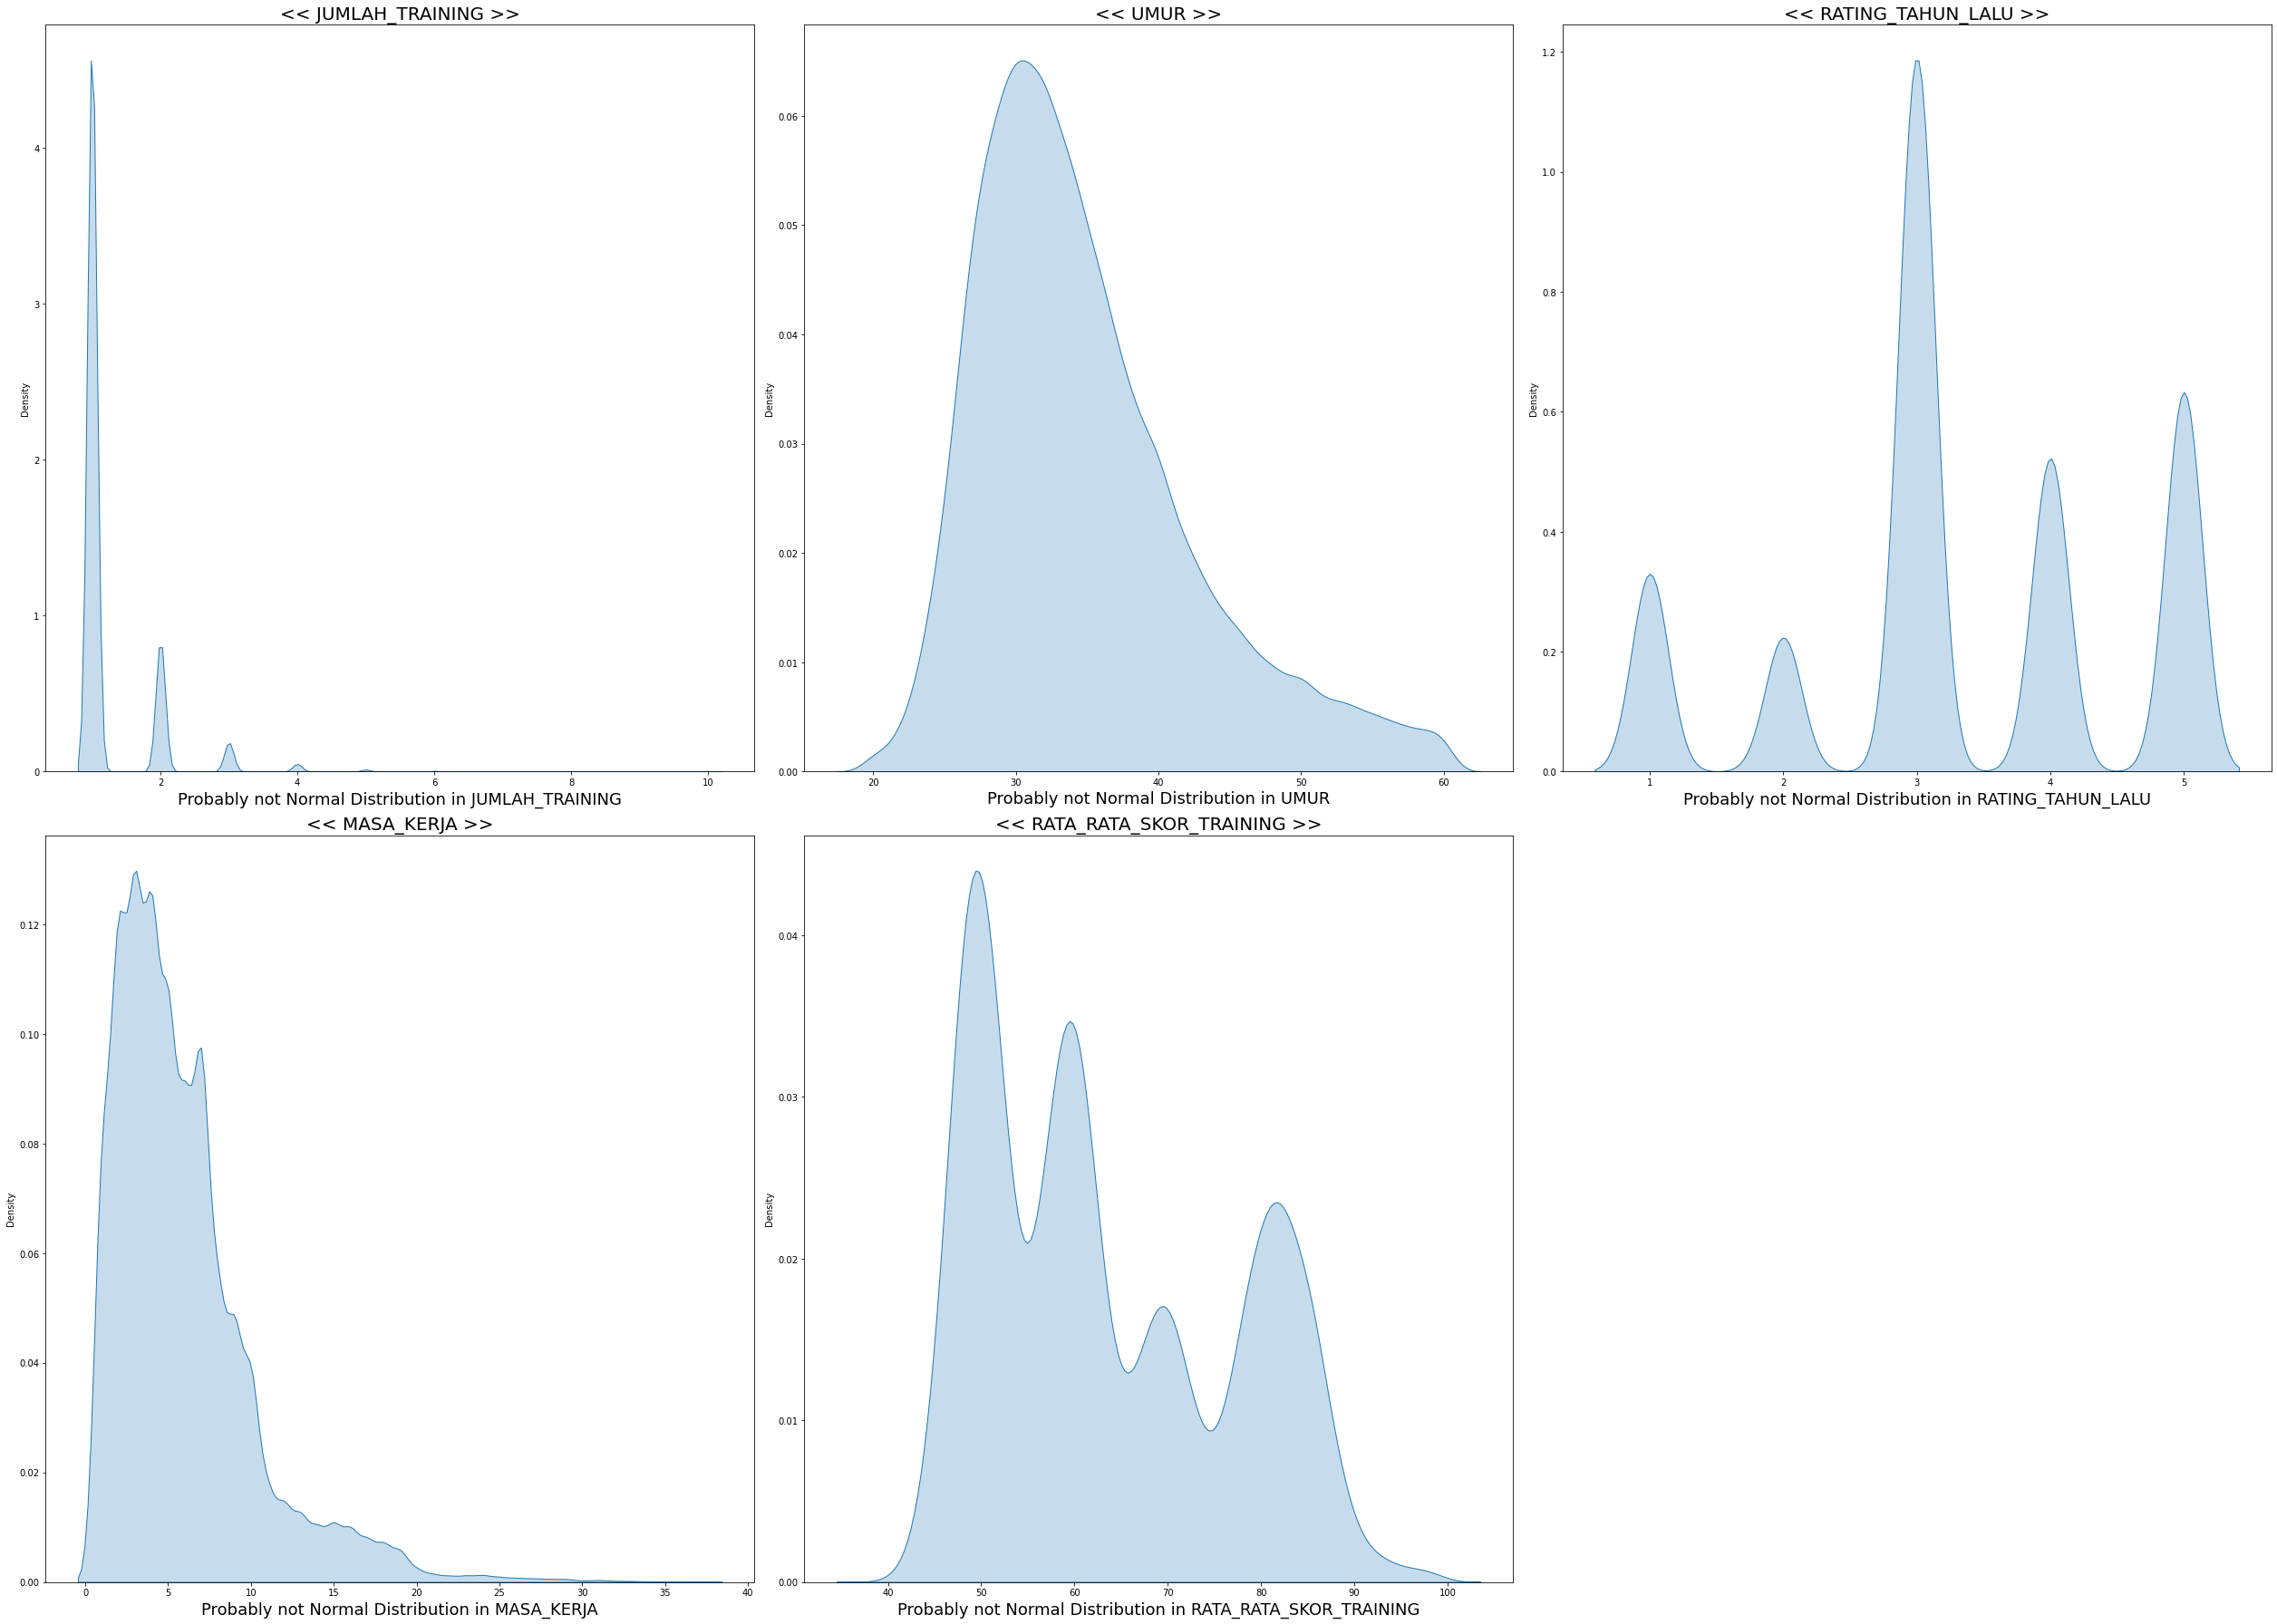

In [32]:
alpha = 0.05
fig, axs = plt.subplots(2, 3, figsize=(35, 25), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.6)
axs = axs.ravel()
reject_null = []
accept_null = []

for index, col in enumerate(num_columns):
    kde_plot = sns.kdeplot(data=df, x=col, ax=axs[index], fill=True, common_norm= True)
    axs[index].set_title(f'< {col.upper()} >',fontsize=16)

    data = df[col].values
    stat, pval = normaltest(data)
    if pval < alpha:
        reject_null.append(col)
        text = f"Probably not Normal Distribution in {col.upper()}"
    else:
        accept_null.append(col)
        text = f"Probably Normal Distribution in {col.upper()}"
        
    axs[index].set_title(f'<< {col.upper()} >>', fontsize=20)
    axs[index].set_xlabel(f"{text}", fontsize=18)

axs.flat[-1].set_visible(False)
fig.tight_layout()

In [33]:
print('Normality Group Accepting null Hypotesis : ', accept_null, sep='\n')
print('---------------------------------------------------------------')
print('Normality Group Rejecting null Hypotesis : ', reject_null, sep='\n')

Normality Group Accepting null Hypotesis : 
[]
---------------------------------------------------------------
Normality Group Rejecting null Hypotesis : 
['jumlah_training', 'umur', 'rating_tahun_lalu', 'masa_kerja', 'rata_rata_skor_training']


- From normality test, we can get information that all features, they look like not coming from Normal Distribution.
- We will check this distribution with respect to Dipromosikan also in the next following section.

#### 2.2 Check the Outlier Value each Feature

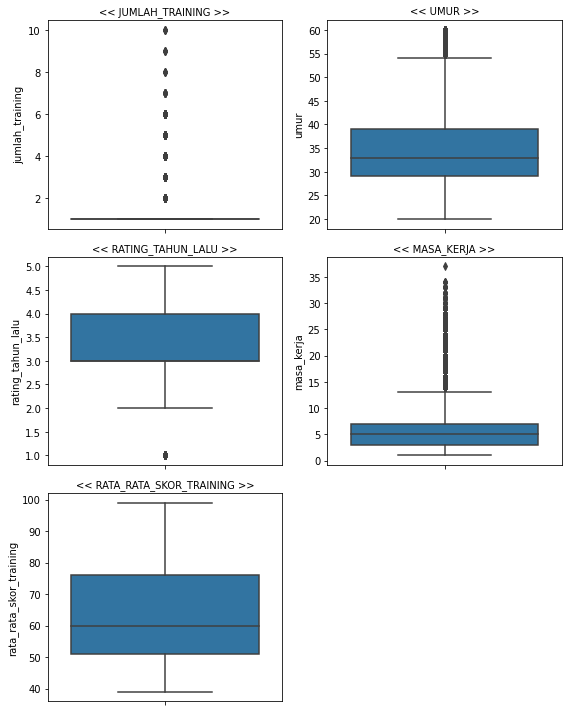

In [34]:
fig, axs = plt.subplots(3, 2, figsize=(8, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.6)
axs = axs.ravel()

for index, col in enumerate(num_columns):
    sns.boxplot(data=df, y=col, ax=axs[index], orient='v')     
    axs[index].set_title(f'<< {col.upper()} >>', fontsize=10)

axs.flat[-1].set_visible(False)
fig.tight_layout()

- With boxplot we can see clearly outlier in our data, most of features have a lot of outlier. its not suprising since our normality test tells us about all our feature is not normal distribution.
- Only Rata_rata_skor_training doesnt have a outlier.
- Rating_tahun_lalu is the only one that has outlier on bottom whisker.

#### 2.3 Correlation between Numerical Features

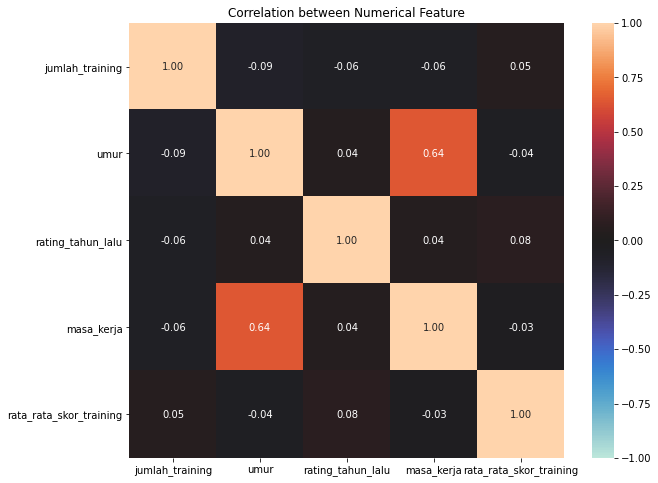

In [35]:
corr_num = associations(dataset=df[num_columns], figsize=(10,8), num_num_assoc='spearman', 
                        title="Correlation between Numerical Feature")
plt.show()

- We use spearman method because our data is not normally distributed.
- From matrix correlation above, we can see our most of continous feature is not correlated to each other, so our data doenst have multicollinearity, its a good, so we can use all of them.
- There are only 2 features are correlated each other, masa_kerja and umur, they have quite strong correlation 0.64. It means that people who have higher masa_kerja, will have higher umur, this is quite make sense.

#### 2.4 Distribution between Numerical Features groupby Dipromosikan

- In this section, we will try to find out whether there is significant difference between 2 group (1 and 0 in Dipromosikan).
- To do that we need to do statiscal test, for not normal distribution we will use Wilcoxon Rank-Sum test.
- First we define the hypotesis as below ;
    - H0: Sample distributions are equal.
    - H1: Sample distributions are not equal.

In [36]:
from scipy.stats import ranksums

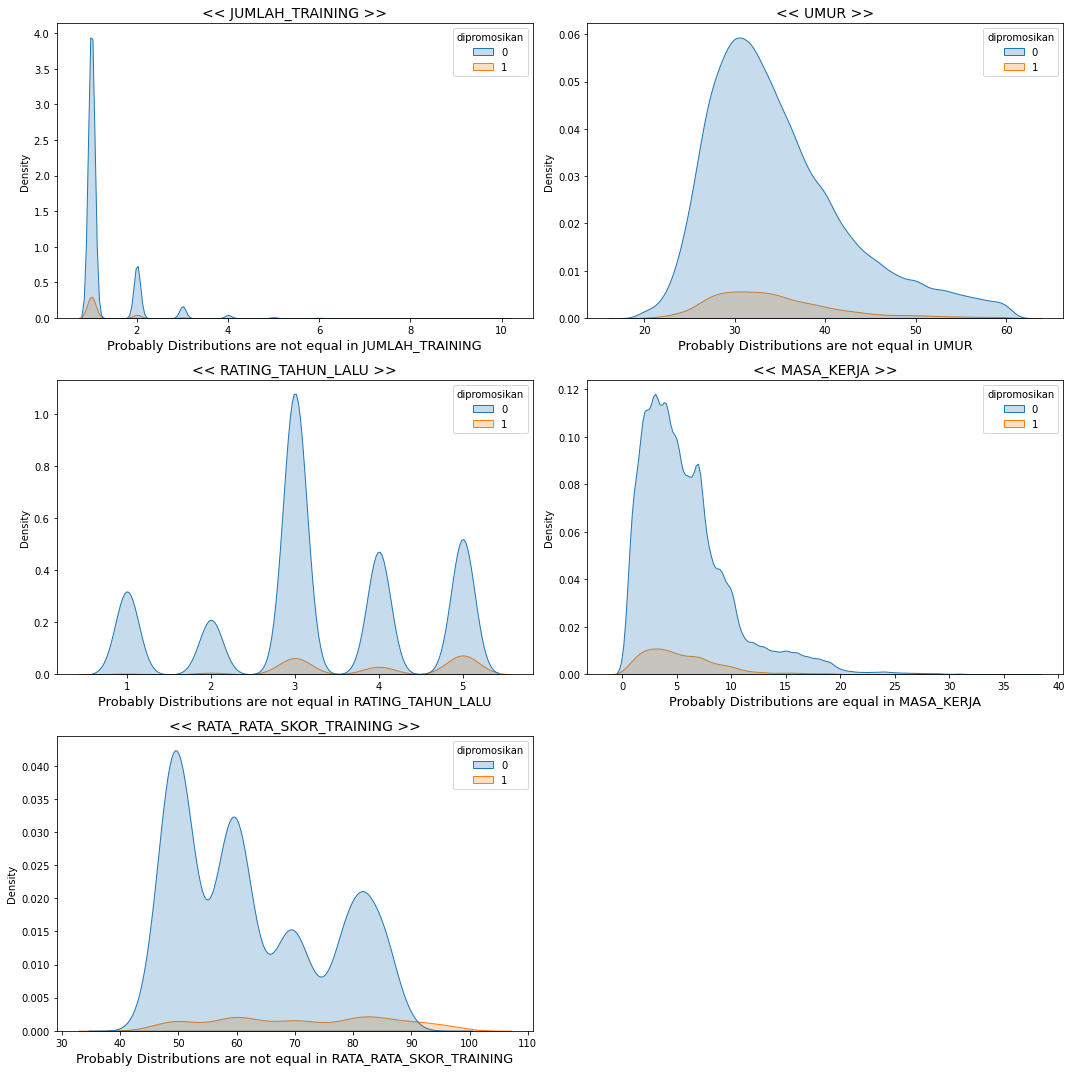

In [37]:
alpha = 0.05
fig, axs = plt.subplots(3, 2, figsize=(15, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.6)
axs = axs.ravel()

reject_null_dist = []
accept_null_dist = []

for index, col in enumerate(num_columns):
    kde_plot = sns.kdeplot(data=df, x=col, ax=axs[index], hue='dipromosikan', fill=True, common_norm= True)
    axs[index].set_title(f'< {col.upper()} >',fontsize=16)
    
    data1 = df[col][df.dipromosikan == 1]
    data2 = df[col][df.dipromosikan == 0]
    
    _, pval = ranksums(data1, data2)
        
    if pval < alpha:
        reject_null_dist.append(col)
        text = f"Probably Distributions are not equal in {col.upper()}"
    else:
        accept_null_dist.append(col)
        text = f"Probably Distributions are equal in {col.upper()}"
        
    axs[index].set_title(f'<< {col.upper()} >>', fontsize=14)
    axs[index].set_xlabel(f"{text}", fontsize=13)

axs.flat[-1].set_visible(False)
fig.tight_layout()

In [38]:
print('Distribution Group Accepting null Hypotesis : ', accept_null_dist, sep='\n')
print('---------------------------------------------------------------')
print('Distribution Group Rejecting null Hypotesis : ', reject_null_dist, sep='\n')

Distribution Group Accepting null Hypotesis : 
['masa_kerja']
---------------------------------------------------------------
Distribution Group Rejecting null Hypotesis : 
['jumlah_training', 'umur', 'rating_tahun_lalu', 'rata_rata_skor_training']


- From the test result, we can infer that, the distribution is not equal in jumlah_training', 'umur', 'rating_tahun_lalu', 'rata_rata_skor_training', it means there is significant difference in distribution between 1 and 0 Dipromosikan in these features.
- Otherwise, there is no significant difference between 1 and 0 Dipromosikan in 'masa_kerja'.
- And also we will also calculate the relationship value in the next section.

#### 2.5 Correlation between Numerical - Categorical Feature (Dipromosikan)

- In this section we want to see about correlation between continous features and Cateforical variable (Dipromosikan).
- We will use correlation ratio to see this relationship, where correlation ration is not like correlation, there is no negative value, the value relies on [0,1], where 1 means , it has strong correlation ratio, and 0 mean there is no correlation ratio.

In [39]:
from dython.nominal import correlation_ratio

In [40]:
value_corr = {}

for col in num_columns:
    ratio_corr = correlation_ratio(df['dipromosikan'], df[col]) 
    value_corr[col] = round(ratio_corr,2)

corr_rat_results = pd.Series(value_corr)
corr_rat_results.sort_values(inplace=True, ascending=False)

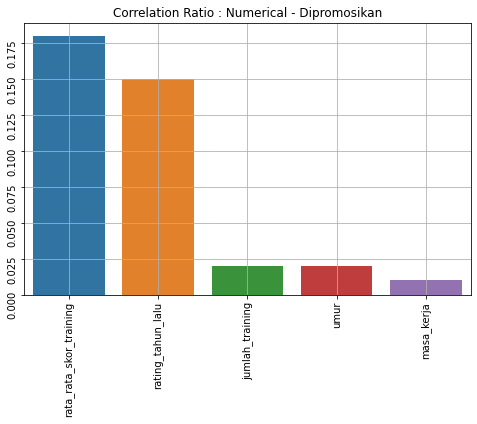

rata_rata_skor_training    0.18
rating_tahun_lalu          0.15
jumlah_training            0.02
umur                       0.02
masa_kerja                 0.01
dtype: float64

In [41]:
plt.figure(figsize=(8,5))
sns.barplot(x =corr_rat_results.index, y = corr_rat_results.values)
plt.title('Correlation Ratio : Numerical - Dipromosikan')
plt.tick_params(labelrotation=90)
plt.grid()
plt.show()
corr_rat_results

- We can see rata_rata_skor_training has the highest correlation ratio with dipromosikan, but it's only weak correlation with 0.18 value.
- And for the others, the value are small less than 0.15.
- we can infer all numerical features, they have weak correlation.
- And if we look again with distribution test, Masa_kerja is the one that has same distribution between 0 - 1 Dipromosikan, this correlation ration support our hypotesis test before.

#### 2.6 Correlation between Numerical - Categorical Feature (all Feature)

- In this section, we will see all correlation between our feature, to get overall relationship in our data.
- Same as before, we define method to calculate this relationship, for numerical we use spearman and for categorical we use cramerV.

In [42]:
num_columns, cat_columns

(['jumlah_training',
  'umur',
  'rating_tahun_lalu',
  'masa_kerja',
  'rata_rata_skor_training'],
 ['departemen',
  'wilayah',
  'pendidikan',
  'jenis_kelamin',
  'rekrutmen',
  'KPI_>80%',
  'penghargaan',
  'dipromosikan'])

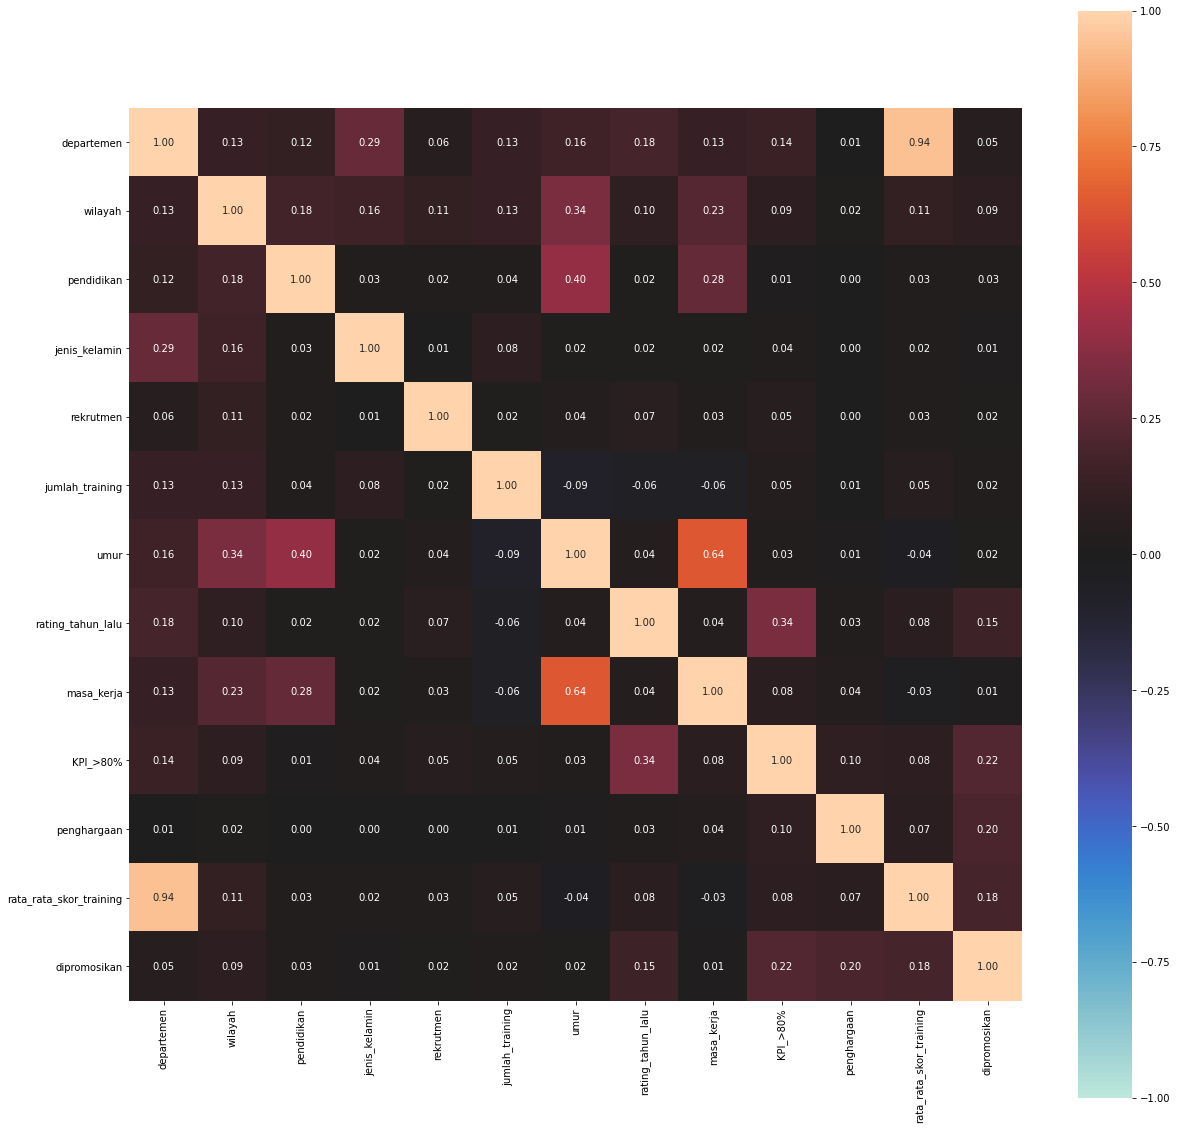

In [43]:
all_corr = associations(dataset=df, numerical_columns= num_columns, 
           nominal_columns = cat_columns, figsize=(20,20), 
           num_num_assoc='spearman', nom_nom_assoc='cramer')
plt.show()

- This matrix actually the same as matrix that we already calculated, its just combination from all feature, to get clearer relationship in our feature.
- The important thing is our data is quite good where there is no multicolinearity between our predictor, except rata_rata_skor_training and departemen.
- And also with this matrix, we can get better perpective to select features to be used in building machine learning.

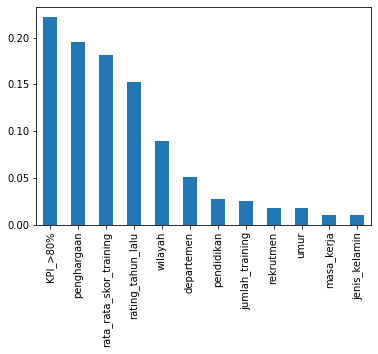

In [44]:
all_corr['corr'].dipromosikan.sort_values(ascending=False)[1:].plot(kind='bar')
plt.show()

### << # END of EDA Section >>

## << BULDING ML SECTION >>

### Splitting Data Train - Test Split

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold

In [46]:
X = df.drop('dipromosikan', axis=1).copy()
y = df.dipromosikan.copy()

In [47]:
y = y.astype(int)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, stratify=y, random_state = 24)

- As we have been told before that we have to split the Data into 60% training and 40% testing.
- Then, dont forget to stratify the data, to keep our class portion is the same.

In [49]:
print('The Portion of YES and NO Dipromosikan in ENTIRE DATA')
print(y.value_counts()/len(y))
print('-'*40)
print('The Portion of YES and NO Dipromosikan in TRAINING DATA')
print(y_train.value_counts()/len(y_train))
print('-'*40)
print('The Portion of YES and NO Dipromosikan in TEST DATA')
print(y_test.value_counts()/len(y_test))

The Portion of YES and NO Dipromosikan in ENTIRE DATA
0    0.91483
1    0.08517
Name: dipromosikan, dtype: float64
----------------------------------------
The Portion of YES and NO Dipromosikan in TRAINING DATA
0    0.914822
1    0.085178
Name: dipromosikan, dtype: float64
----------------------------------------
The Portion of YES and NO Dipromosikan in TEST DATA
0    0.914842
1    0.085158
Name: dipromosikan, dtype: float64


- Since we already split train and test data with stratify mode, but it is for Training and Test Data, for Training and Entire data we have to make sure the portion is equal.
- After we check, the portion is equal between ENTIRE data and TRAINING data as above.

In [50]:
print('The Portion of YES and NO KPI_>80% in ENTIRE DATA')
print(X['KPI_>80%'].value_counts()/len(X))

print('-'*40)
print('The Portion of YES and NO KPI_>80% in TRAINING DATA')
print(X_train['KPI_>80%'].value_counts()/len(X_train))

print('-'*40)
print('The Portion of YES and NO KPI_>80% in TEST DATA')
print(X_test['KPI_>80%'].value_counts()/len(X_test))

The Portion of YES and NO KPI_>80% in ENTIRE DATA
0    0.648026
1    0.351974
Name: KPI_>80%, dtype: float64
----------------------------------------
The Portion of YES and NO KPI_>80% in TRAINING DATA
0    0.648948
1    0.351052
Name: KPI_>80%, dtype: float64
----------------------------------------
The Portion of YES and NO KPI_>80% in TEST DATA
0    0.646643
1    0.353357
Name: KPI_>80%, dtype: float64


- And also we are interested in portion of KPI_>80%, since this columns has the highest association value with dipromosikan.
- The portion is quite balance, so its good to used this splitted data.

In [51]:
for i in cat_columns:
    if i != 'dipromosikan':
        a = sorted(X[i].unique())
        b = sorted(X_train[i].unique()) 
        c = sorted(X_test[i].unique())
        
        print('Are unique items ENTIRE DATA, TRAINING DATA, TEST DATA the same :')
        print(i, 'RESULT :', a == b == c)

Are unique items ENTIRE DATA, TRAINING DATA, TEST DATA the same :
departemen RESULT : True
Are unique items ENTIRE DATA, TRAINING DATA, TEST DATA the same :
wilayah RESULT : True
Are unique items ENTIRE DATA, TRAINING DATA, TEST DATA the same :
pendidikan RESULT : True
Are unique items ENTIRE DATA, TRAINING DATA, TEST DATA the same :
jenis_kelamin RESULT : True
Are unique items ENTIRE DATA, TRAINING DATA, TEST DATA the same :
rekrutmen RESULT : True
Are unique items ENTIRE DATA, TRAINING DATA, TEST DATA the same :
KPI_>80% RESULT : True
Are unique items ENTIRE DATA, TRAINING DATA, TEST DATA the same :
penghargaan RESULT : True


- And also we want that our categorical classes are available either on Training Data and Test Data.
- After check we can see all unique value in all categorical feature are available in the both side.
- Now our data is ready to be trained.

### Make Pipeline 

In [52]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [53]:
# Because in previous setion we change the data type into object, now we will change it back into numerical

for item in ['KPI_>80%', 'penghargaan']:
    X[item] = X[item].astype(int)
    X_train[item] = X_train[item].astype(int)
    X_test[item] = X_test[item].astype(int)

In [54]:
numerical_ix = list(X.select_dtypes(include=['int64', 'float64']).columns)
categorical_ix = list(X.select_dtypes(include=['object', 'bool']).columns)

print(numerical_ix)
print(categorical_ix)

['jumlah_training', 'umur', 'rating_tahun_lalu', 'masa_kerja', 'KPI_>80%', 'penghargaan', 'rata_rata_skor_training']
['departemen', 'wilayah', 'pendidikan', 'jenis_kelamin', 'rekrutmen']


In [55]:
numeric_transformer = MinMaxScaler()                             # for not normal distribution feature
categorical_transformer = OneHotEncoder(handle_unknown='ignore') # for Categorical Feature

In [56]:
preprocessor = ColumnTransformer(transformers = [
                 ('NotNormalDistribution', numeric_transformer, numerical_ix),
                 ('CategoricalTrans', categorical_transformer, categorical_ix)])

### Training Model

- In first try we will train with original data as our basic prediction, we dont do balancing or feature selection, or even hyper parameter tuning. We are interested in knowing what is the result from the basic.
- In the next step we will try to use, balancing and feature selection, than we compare the result with basic prediction

In [57]:
from sklearn.metrics import  accuracy_score, plot_roc_curve, f1_score, precision_score, classification_report, recall_score, roc_auc_score

In [58]:
def evaluate_matrix(ytrue, ypred, y_predict_prob, name):
    # since our minority class is 1, we want to know how good our classifier predicts the class 1, 
    # so we define the pos_label = 1, in our precission, recall, and f1score
    
    matrix_name = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score','ROC']
    acc = accuracy_score(ytrue, ypred,)
    roc = roc_auc_score(ytrue, y_predict_prob[:,1])
    prec = precision_score(ytrue, ypred, pos_label=1)
    rec = recall_score(ytrue, ypred, pos_label=1)
    f1 = f1_score(ytrue, ypred, pos_label=1)
    
    matrix_dict = dict(zip(matrix_name, [name, acc, prec, rec, f1, roc]))
    
    return matrix_dict

#### ===== Training Basic Prediction =====

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [226]:
# Logistic Regression
lr_model = LogisticRegression()

# Random Forest
rf_model = RandomForestClassifier(random_state=40)

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=40)

# KNeighbors
knn_model = KNeighborsClassifier()

# Decision Tree
dt_model = DecisionTreeClassifier()

# Ada Boost
ada_model = AdaBoostClassifier()

all_model = [rf_model, gb_model, lr_model, dt_model, ada_model]

====== training : RandomForestClassifier
====== training : GradientBoostingClassifier
====== training : LogisticRegression
====== training : DecisionTreeClassifier
====== training : AdaBoostClassifier


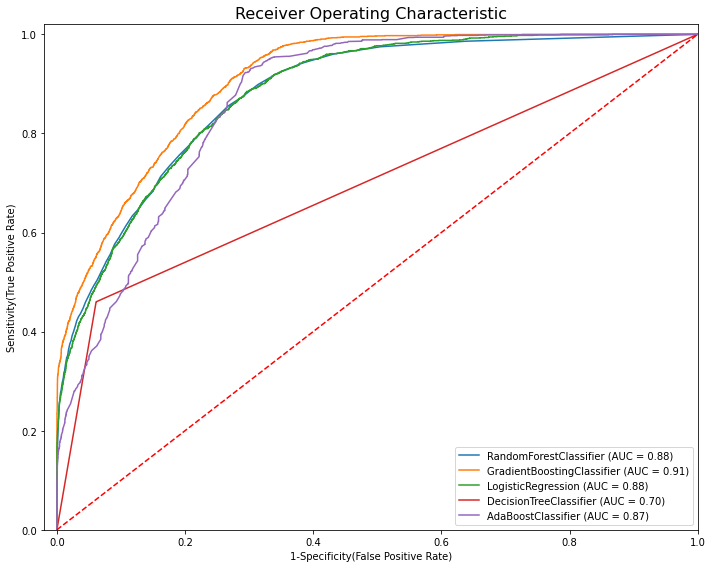

,Model,Accuracy,Precision,Recall,F1_Score,ROC,Cross_Val_F1
0,RandomForestClassifier,0.933178,0.820064,0.275844,0.412826,0.880672,0.420489
1,GradientBoostingClassifier,0.940066,0.964706,0.307445,0.466288,0.908428,0.449876
2,LogisticRegression,0.932813,0.864815,0.250134,0.388035,0.881403,0.375496
3,DecisionTreeClassifier,0.898011,0.411596,0.460096,0.434497,0.699422,0.434044
4,AdaBoostClassifier,0.924831,0.733475,0.184253,0.294521,0.868464,0.289016


In [230]:
matrix = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC']
model_results = pd.DataFrame(columns= matrix)
kfold = StratifiedKFold(n_splits=5)
scoring = 'f1'

fig_auc, ax_auc = plt.subplots(figsize=(8, 7))

for model in all_model:
    model_name = model.__class__.__name__
    print('====== training :', model_name)
    
    # Create Model Pipeline to make prediction
    model_pipe = Pipeline(steps=[('Preprocessor', preprocessor), ('Classifier', model)])
    
    # Evaluate with Cross Validation
    cv_acc = cross_val_score(estimator = model_pipe, X = X, y = y, cv = kfold, scoring=scoring, n_jobs =-1)
    
    # Evaluate with Test Data
    model_pipe.fit(X_train, y_train)
    y_predict = model_pipe.predict(X_test)
    y_predict_prob = model_pipe.predict_proba(X_test)
    
    matrix_dict = evaluate_matrix(y_test, y_predict, y_predict_prob, model_name)
    matrix_dict['Cross_Val_F1'] = cv_acc.mean()
    model_results = model_results.append(matrix_dict, ignore_index=True)
    
    # Plot TRUE POSITIVE RATE AND FALSE POSITIVE RATE
    plot_roc_curve(model_pipe, X_test, y_test, ax=ax_auc, name=model_name)


plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic', fontsize= 16)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

display(model_results)

- Now we have the baseline result of our classifier.
- Based on the training result, we can see, GradientBoost stands out from the others.
- GradientBoost has the highest score of ROC. Because this case is imbalance class, we would like to know how good our model predicts the minority class (class 1), as we define before in our matrix evaluation, we can see gradientboost has the highest value of F1_score.
- And also we check the F1_score with cross_validation with 5 fold to ensure the model performance, then still GradientBoost has the highest Score.
- DecisionTree, even it has highest Recall score, but if we look the Precision is the worst. So we will not use this model.
- In conclusion, We will use gradient boost in further process (Feature Selection, Balancing, Hypertuning).

#### ===== Feature Selection ======

- In this Section we will train the model with feature selection method.
- We will see the result, if we use GradientBoost classifier, as we knew before, it gave us the best result on basic prediction.

In [60]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, SelectFpr

In [61]:
from sklearn.base import BaseEstimator, TransformerMixin

In [62]:
class FeatureSelections(BaseEstimator, TransformerMixin):
    def __init__(self, selector, len_num):
        self.selector = selector
        self.len_num = len_num
        
    def fit(self, X, y):
        self.selector.fit(X[:, self.len_num:], y)

        return self
    
    def get_support(self):
        return self.selector.get_support()
        
    def transform(self, X):

        Xtrans = self.selector.transform(X[:, self.len_num:])
        numerical = X[:, : self.len_num].toarray()
        categorical = Xtrans.toarray()
        Xtrans_new = np.append(numerical, categorical, axis=1)
        
        return Xtrans_new

In [92]:
def train_with_ftselection(model, method_selection, Xtr, ytr, Xts, yts):
    name_model = model.__class__.__name__
    
    # Model Pipeline with Feature Selection
    feature_sel = FeatureSelections(selector=method_selection, len_num=len(numerical_ix))
    Prep_pipe = Pipeline(steps=[('Preprocessor', preprocessor), ('FtSelection', feature_sel)])
    model_pipe_ft = Pipeline(steps=[('AllPrep', Prep_pipe), ('Classifier', model)])
    model_pipe_ft.fit(Xtr, ytr)
    
    # Model Fitting and Predicting
    model_pred = model_pipe_ft.predict(Xts)
    model_pred_prob = model_pipe_ft.predict_proba(Xts)

    print(classification_report(yts, model_pred)) 
    print(evaluate_matrix(yts, model_pred, model_pred_prob , name_model))
    
    return model_pipe_ft

In [120]:
model_tr = GradientBoostingClassifier(random_state=40)
Kbest = SelectKBest(chi2, k=40)
model_tr_sel = train_with_ftselection(model_tr, Kbest, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     20057
           1       0.95      0.31      0.47      1867

    accuracy                           0.94     21924
   macro avg       0.95      0.66      0.72     21924
weighted avg       0.94      0.94      0.93     21924

{'Model': 'GradientBoostingClassifier', 'Accuracy': 0.9400656814449918, 'Precision': 0.9525368248772504, 'Recall': 0.31173004820567757, 'F1_Score': 0.4697336561743341, 'ROC': 0.9085215598319295}


- Now we have model with feature selection, we select 40 features instead of 51 of Categorical Features, 7 Numerical Features. So total our Model is trained with 47 Features.
- Even our score doesnt improve, but our computation process is lower than before. we remove 11 columns from the training process, and if we multiply with X_train rows 32884, it will be 361724 entries are removed.

In [121]:
cat_feature_names = model_tr_sel.named_steps['AllPrep'].named_steps['Preprocessor'].named_transformers_['CategoricalTrans'].get_feature_names()
cat_feature_sel = model_tr_sel.named_steps['AllPrep'].named_steps['FtSelection'].get_support()

In [103]:
total_columns = numerical_ix + cat_feature_names[cat_feature_sel].tolist()

In [105]:
df_ft_importance = pd.DataFrame({'Parameter': total_columns, 
                                 'Value' : model_tr_sel.named_steps['Classifier'].feature_importances_})

<AxesSubplot:xlabel='Value', ylabel='Parameter'>

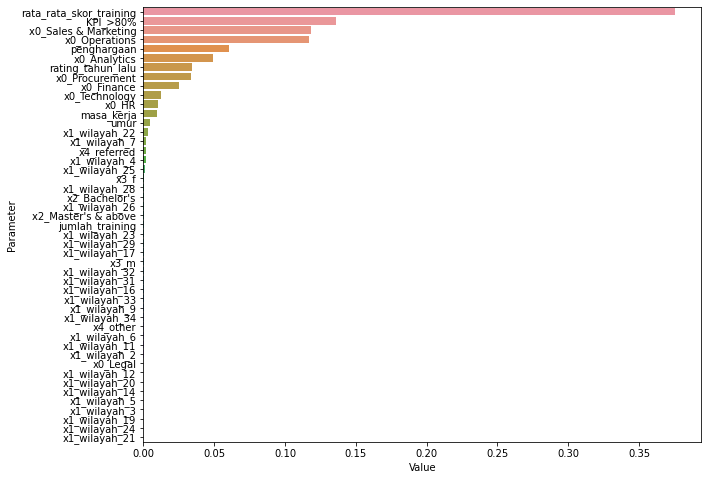

In [117]:
plt.figure(figsize=(10,8))
sns.barplot(data = df_ft_importance.sort_values(by='Value', ascending=False),y='Parameter', x='Value', orient='h')

#### ====== Balancing the Data ========

- In this Section, we would like to try balancing the training data, then see the result, if we used the balanced data to predict the test data.
- We will try to use balancing method to see the result.

In [141]:
from imblearn.pipeline import Pipeline as PipelineImb

In [149]:
def train_with_ftselection_resampling(model, method_selection, method_resampling, Xtr, ytr, Xts, yts):
    name_model = model.__class__.__name__
    
    # Build Feature Selection - and Resampling
    feature_sel = FeatureSelections(selector=method_selection, len_num=len(numerical_ix))
    Prep_pipe = Pipeline(steps=[('Preprocessor', preprocessor), ('FtSelection', feature_sel)])
    Resampling_pipe = PipelineImb(steps=[('Resampling', method_resampling), ('model', model)])
    
    # Overall Model Pipeline
    model_pipe_ft = Pipeline(steps=[('AllPrep', Prep_pipe), ('SamplingNPredict', Resampling_pipe)])
    
    # Model Fitting and Predict
    model_pipe_ft.fit(Xtr, ytr)
    model_pred = model_pipe_ft.predict(Xts)
    model_pred_prob = model_pipe_ft.predict_proba(Xts)

    print(classification_report(yts, model_pred)) 
    print(evaluate_matrix(yts, model_pred, model_pred_prob , name_model))
    
    return model_pipe_ft

###### -> Random Over Sampling

In [146]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
model_tr = GradientBoostingClassifier(random_state=40)
Kbest = SelectKBest(chi2, k=40)
test = train_with_ftselection_resampling(model_tr, Kbest, ros, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.99      0.69      0.82     20057
           1       0.22      0.94      0.36      1867

    accuracy                           0.71     21924
   macro avg       0.61      0.82      0.59     21924
weighted avg       0.93      0.71      0.78     21924

{'Model': 'GradientBoostingClassifier', 'Accuracy': 0.7146506112023353, 'Precision': 0.22225034805720795, 'Recall': 0.9405463310123192, 'F1_Score': 0.3595413595413595, 'ROC': 0.9024845206159767}


- If we see the result, this is pretty bad result. Our total accuracy drop to the 71%, it means our model performs worse than before, precision for class 1 is the worst result with 0.22.
- So we will not use this approach to balance our data.

#### -> NeighbourHood Undersampling

In [147]:
from imblearn.under_sampling import NeighbourhoodCleaningRule

ncr = NeighbourhoodCleaningRule()
model_tr = GradientBoostingClassifier(random_state=40)
Kbest = SelectKBest(chi2, k=40)
test = train_with_ftselection_resampling(model_tr, Kbest, ncr, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     20057
           1       0.86      0.31      0.46      1867

    accuracy                           0.94     21924
   macro avg       0.90      0.65      0.71     21924
weighted avg       0.93      0.94      0.92     21924

{'Model': 'GradientBoostingClassifier', 'Accuracy': 0.9373289545703338, 'Precision': 0.8630338733431517, 'Recall': 0.3138725227637922, 'F1_Score': 0.46032992930086414, 'ROC': 0.9054147607545596}


- With this method we get a better score than RandomOverSampling, but still is worse than without using resampling.

#### -> TomekLinks Undersampling

In [150]:
from imblearn.under_sampling import TomekLinks

t1 = TomekLinks()
model_tr = GradientBoostingClassifier(random_state=40)
Kbest = SelectKBest(chi2, k=40)
test = train_with_ftselection_resampling(model_tr, Kbest, t1, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     20057
           1       0.94      0.31      0.46      1867

    accuracy                           0.94     21924
   macro avg       0.94      0.65      0.72     21924
weighted avg       0.94      0.94      0.93     21924

{'Model': 'GradientBoostingClassifier', 'Accuracy': 0.9394727239554825, 'Precision': 0.9411764705882353, 'Recall': 0.3085163363685056, 'F1_Score': 0.4647035094796288, 'ROC': 0.9071455137005223}


- In this method, we get almost the same score as our "without resampling" method. But if we use this method, we dont get any benefit, or even it will give us more time in training.

###### -> Random Under Sampling

In [151]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='majority')
model_tr = GradientBoostingClassifier(random_state=40)
Kbest = SelectKBest(chi2, k=40)
test = train_with_ftselection_resampling(model_tr, Kbest, undersample, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.99      0.70      0.82     20057
           1       0.23      0.94      0.37      1867

    accuracy                           0.72     21924
   macro avg       0.61      0.82      0.60     21924
weighted avg       0.93      0.72      0.78     21924

{'Model': 'GradientBoostingClassifier', 'Accuracy': 0.7239554825761723, 'Precision': 0.22792874788714082, 'Recall': 0.9389394750937332, 'F1_Score': 0.3668131408244403, 'ROC': 0.90164104877425}


- And also this method leads us to the worse result than "without resampling" method.
- So the conclusion is, we dont do any Resampling Method for this case.

#### ======= Tuning Hyperparameter ========

In [153]:
from sklearn.model_selection import GridSearchCV

In [155]:
# ===== Model Preparation =====
Kbest = SelectKBest(chi2, k=40)
feature_sel = FeatureSelections(selector=Kbest, len_num=len(numerical_ix))
Prep_pipe = Pipeline(steps=[('Preprocessor', preprocessor), ('FtSelection', feature_sel)])
model_gs = GradientBoostingClassifier(random_state=40)

model_pipe_gs = Pipeline(steps=[('AllPrep', Prep_pipe), ('Classifier', model_gs)])

In [176]:
kfold = StratifiedKFold(n_splits=5)
gb_params = {'Classifier__n_estimators' : [200, 220],
             'Classifier__max_depth': [4, 5, 7],
             'Classifier__learning_rate' : [0,12 ,0.13]}

gb_gcv = GridSearchCV(estimator= model_pipe_gs, param_grid=gb_params, cv=kfold, n_jobs=-1, scoring='f1')
gb_gcv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('AllPrep',
                                        Pipeline(steps=[('Preprocessor',
                                                         ColumnTransformer(transformers=[('NotNormalDistribution',
                                                                                          MinMaxScaler(),
                                                                                          ['jumlah_training',
                                                                                           'umur',
                                                                                           'rating_tahun_lalu',
                                                                                           'masa_kerja',
                                                                                           'KPI_>80%',
                                               

In [178]:
gb_gcv.best_params_, gb_gcv.best_score_

({'Classifier__learning_rate': 0.13,
  'Classifier__max_depth': 5,
  'Classifier__n_estimators': 200},
 0.5004968366263343)

- After searching some parameters, we get this parameters work better than before. 
  - {'Classifier__learning_rate': 0.12,
  - 'Classifier__max_features': None,
  - 'Classifier__n_estimators': 200}
- We will those paramters in the final model

In [187]:
### BEST MODEL ###
Kbest = SelectKBest(chi2, k=40)
feature_sel = FeatureSelections(selector=Kbest, len_num=len(numerical_ix))
Prep_pipe = Pipeline(steps=[('Preprocessor', preprocessor), ('FtSelection', feature_sel)])
model_gs2 = GradientBoostingClassifier(random_state=40, learning_rate=0.12, n_estimators=200)

model_pipe_gs2 = Pipeline(steps=[('AllPrep', Prep_pipe), ('Classifier', model_gs2)])

model_pipe_gs2.fit(X_train, y_train)
gcv_pred2 = model_pipe_gs.predict(X_test)
gcv_pred_prob2 = model_pipe_gs.predict_proba(X_test)

print(classification_report(y_test, gcv_pred2)) 
display(evaluate_matrix(y_test, gcv_pred2, gcv_pred_prob2 , 'gcv_gb'))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     20057
           1       0.93      0.34      0.50      1867

    accuracy                           0.94     21924
   macro avg       0.94      0.67      0.73     21924
weighted avg       0.94      0.94      0.93     21924



{'Model': 'gcv_gb',
 'Accuracy': 0.9417989417989417,
 'Precision': 0.9288824383164006,
 'Recall': 0.3427959292983396,
 'F1_Score': 0.5007824726134585,
 'ROC': 0.9113247651264064}

- The Conclusion about Building ML ; 
  - We use GradientBoosting Model as our classifier.
  - We use feature selection to reduce our matrix calculation, with the same result.
  - Then we dont use any resampling method, because our result tends to be worse.
  - And to find the best parameter, we use gridsearchCV, but still only small improvement that we got.
  - F1_Score improves from 0.47 to 0.5, and also AUC score improves from 0.90 to 0.91.

### << # END of Building ML Section >>

In [ ]:
"THANK YOU"